# PISA 2012
### By Shubham Kumar

***PISA (Programme for International Student Assessment) is a unique global survey that examines how well prepared 15 year old students are for life after they have completed school. Approximately a half million students and 65 economies participated in this assessment that deals with reading, math, and science literacy.*** 

The 2012 PISA dataset can be found [here.](https://www.oecd.org/pisa/data/pisa2012database-downloadabledata.htm)

The original data set contains 485,490 students and 636 features. We reduced the size of dataset by selecting only 

My data cleaning process can be found in **(pisa2012_data_cleanup.ipynb)**

### BRIEF DATA CLEANING PROCESS ###

- *For our data cleaning process, we focused on features that dealt with the country, gender, age, math scores, reading scores, science scores, student's attitudes and student's perceived attitudes of parents towards mathematics. Student's attitudes can be broken down into categories: instrumental motivation, math anxiety, math self-concept, math interest, math work ethic, and math behavior. For each subcategory under student's attitudes, I assigned points and took the average to represent the overall score for each subcategory.* 
- *For example, instumental motivation asks 4 questions (worthwhile for work, worthwhile for career changes, important for future study, and helps to get a job). Each of these questions can be answered by either 'Strongly Agree', 'Agree', 'Disagree','Strongly Disagree.'

**FEATURES**
- **country**

- **gender**

- **overall_score**: student's overall math score

- **The following are on a 4 point scale (4 points Strongly Agree, 3 points Agree, 2 points Disagree, 1 point Strongly Disagree):**
    - **Motivation**: worthwhile for work, worthwhile for career changes, important for future study, helps to get a job
    - **Anxiety**: worry that it will be difficult, get very tense, get very nervous, feel helpless, worry about getting poor grades
    - **Interest**: enjoy reading, look forward to lessons, enjoy maths, interested
    - **Work_Ethic**: homework completed on time, work hard on homework, prepared for exams, student hard for quizzes, study until I understand everything, pay attention in class, listen in classes, avoid distractions when studying, keep work organized
    - **Parents**: student's perceived view of parent's attitude towards mathematics; parents believe studying mathematics is important, parents believe mathematics is important for career, parents like mathematics

- **The following are on a 4 point scale (4 points Almost of Almost Always, 3 points Often, 2 points Sometimes, 1 point Never or rarely):**
    - **Behavior**: talk about maths with friends, help friends with mat, extracurricular activity,participates in competition, study more than 2 extra hours a day, play chess, computer programming, participates in math club

In [93]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [94]:
# Loading the dataset
df = pd.read_csv('pisa2012_clean.csv')
df.head()

C:\Users\Shubham\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


country  gender                          mother_school  \
0  Albania  Female                      <ISCED level 3A>    
1  Albania  Female                      <ISCED level 3A>    
2  Albania  Female                  <ISCED level 3B, 3C>    
3  Albania  Female                  <ISCED level 3B, 3C>    
4  Albania  Female  She did not complete <ISCED level 1>    

                           mother_job          father_school  \
0  Other (e.g. home duties, retired)       <ISCED level 3A>    
1        Working full-time <for pay>       <ISCED level 3A>    
2        Working full-time <for pay>       <ISCED level 3A>    
3        Working full-time <for pay>       <ISCED level 3A>    
4         Working part-time <for pay>  <ISCED level 3B, 3C>    

                     father_job father_nation mother_nation student_nation  \
0   Working part-time <for pay>       Albania       Albania        Albania   
1  Working full-time <for pay>        Albania       Albania        Albania   
2  Working full-time <for pay>        Albania       Albania        Albania   
3  Working full-time <for pay>        Albania       Albania        Albania   
4   Working part-time <for pay>       Albania       Albania        Albania   

    age  ... motivation anxiety interest work_ethic   parents behavior  self  \
0  17.0  ...       3.50     2.6     3.00   3.000000  3.000000     1.75   2.8   
1  17.0  ...       2.75     NaN     2.25   3.222222  2.666667     2.50   NaN   
2  16.0  ...       4.00     NaN     3.25   3.888889  3.666667     2.00   NaN   
3  16.0  ...        NaN     NaN      NaN        NaN       NaN      NaN   2.6   
4  16.0  ...       4.00     3.2     2.50   3.777778  3.666667      NaN   2.4   

  avg_math_score  avg_reading_score  avg_science_score  
0      366.18634          261.01424          371.91348  
1      470.56396          384.68832          478.12382  
2      505.53824          405.18154          486.60946  
3      449.45476          477.46376          453.97240  
4      385.50398          256.01010          367.15778  

[5 rows x 28 columns]

In [95]:
#overview of data shape and composition
print(df.shape)
print(df.info())

(485490, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   country            485490 non-null  object 
 1   gender             485490 non-null  object 
 2   mother_school      457979 non-null  object 
 3   mother_job         467751 non-null  object 
 4   father_school      443261 non-null  object 
 5   father_job         451410 non-null  object 
 6   father_nation      470136 non-null  object 
 7   mother_nation      473401 non-null  object 
 8   student_nation     477304 non-null  object 
 9   age                485374 non-null  float64
 10  first_lang_learn   129658 non-null  object 
 11  mother_lang        44012 non-null   object 
 12  father_lang        43219 non-null   object 
 13  siblings_lang      42277 non-null   object 
 14  friend_lang        42832 non-null   object 
 15  school_lang        42864 non-null   ob

In [96]:
# Converting columns into category column
df[['country','gender']] = df[['country','gender']].astype('category')

In [97]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   country            485490 non-null  category
 1   gender             485490 non-null  category
 2   mother_school      457979 non-null  object  
 3   mother_job         467751 non-null  object  
 4   father_school      443261 non-null  object  
 5   father_job         451410 non-null  object  
 6   father_nation      470136 non-null  object  
 7   mother_nation      473401 non-null  object  
 8   student_nation     477304 non-null  object  
 9   age                485374 non-null  float64 
 10  first_lang_learn   129658 non-null  object  
 11  mother_lang        44012 non-null   object  
 12  father_lang        43219 non-null   object  
 13  siblings_lang      42277 non-null   object  
 14  friend_lang        42832 non-null   object  
 15  school_lang        42864 non-null 

**What is the structure of your dataset?**

*There are **485,490 students** in the dataset with **28 features (country, gender, overall math score, motivation, anxiety, interest, work ethic, behavior, self, and parents).** Country and Gender are of category type and the remainder of the features are numeric.*

**What is/are the main feature(s) of interest in your dataset?**

*I am interested in seeing the effects of gender has on students' mathematical skills. I not only wanted to take into account the students' math scores, but also the students and parent's feelings towards Mathematics.* 

*From my own experience of studying Mathematics in college, I have seen a large gender gap in my higher math classes where the male student population far exceeds that of female students. Check if the large gender gap is due to having a gap in scores and/or attitude between gender. In addition, We should check if the Mathematic Skills and Attitudes between Gender across different countries as well if a student's perceived attitude of their parents differ between gender.*

**What features in the dataset do you think will help support your investigation into your feature(s) of interest?**

I expect that there will be a higher overall test and subsection score among males compared to that of females. For test scores, we will be looking at the score_overall. I also expect there to be a higher attitude towards mathematics among males compared to that of the females. For attitudes, we will be looking at the following features: **motivation, anxiety, interest, work_ethic, behavior, and self.** All attitude features, with the exception of **'anxiety', show that the higher the score is, the better the student's attitude is towards Mathematics.** 

## Univariate Exploration 

### *Scores of the Students*

In [98]:
# Setting grid type and base color

base_color = sb.color_palette()[0]
sb.set_style('whitegrid')

In [99]:
# summary of data
df.describe()

age        wealth     motivation        anxiety  \
count  485374.000000  479597.00000  312694.000000  307425.000000   
mean       16.234852      -0.33701       2.988886       2.495314   
std         0.423907       1.21530       0.740661       0.683011   
min        16.000000      -6.65000       1.000000       1.000000   
25%        16.000000      -1.04000       2.500000       2.000000   
50%        16.000000      -0.30000       3.000000       2.400000   
75%        16.000000       0.43000       3.500000       3.000000   
max        17.000000       3.25000       4.000000       4.000000   

            interest     work_ethic        parents       behavior  \
count  311611.000000  306731.000000  311682.000000  307112.000000   
mean        2.445061       2.866265       3.066485       1.677428   
std         0.779287       0.577228       0.610225       0.557671   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       2.555556       2.666667       1.250000   
50%         2.500000       2.888889       3.000000       1.500000   
75%         3.000000       3.222222       3.666667       1.875000   
max         4.000000       4.000000       4.000000       4.000000   

                self  avg_math_score  avg_reading_score  avg_science_score  
count  306931.000000   485490.000000      485490.000000      485490.000000  
mean        2.482890      469.651234         472.006964         475.808094  
std         0.742968      100.786610          98.863310          97.998470  
min         1.000000       54.767080           6.445400          25.158540  
25%         2.000000      396.019620         405.044200         405.762800  
50%         2.400000      465.734520         475.477980         475.512860  
75%         3.000000      540.123060         542.831195         546.381920  
max         4.000000      903.107960         849.359740         857.832900

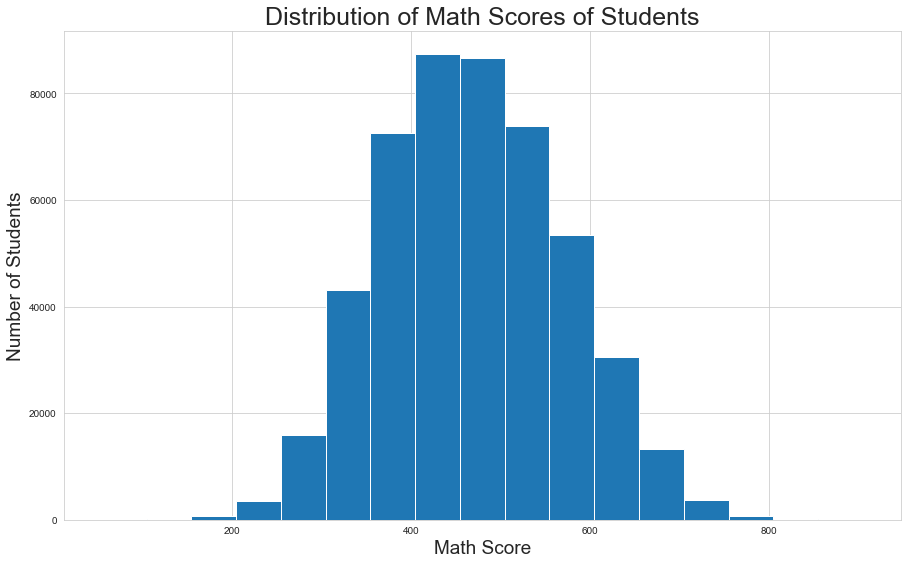

In [100]:
# Average Score

binsize = 50
bins = np.arange(df['avg_math_score'].min(), df['avg_math_score'].max() + binsize, binsize)

plt.figure(figsize = [15, 9])
plt.hist(data = df, x = 'avg_math_score', bins = bins, color = base_color)
plt.title('Distribution of Math Scores of Students', size = 25)
plt.xlabel('Math Score', fontsize = 19)
plt.ylabel('Number of Students', fontsize = 19);

***The average Score of Math is normally distributed with a peak at around 450.***

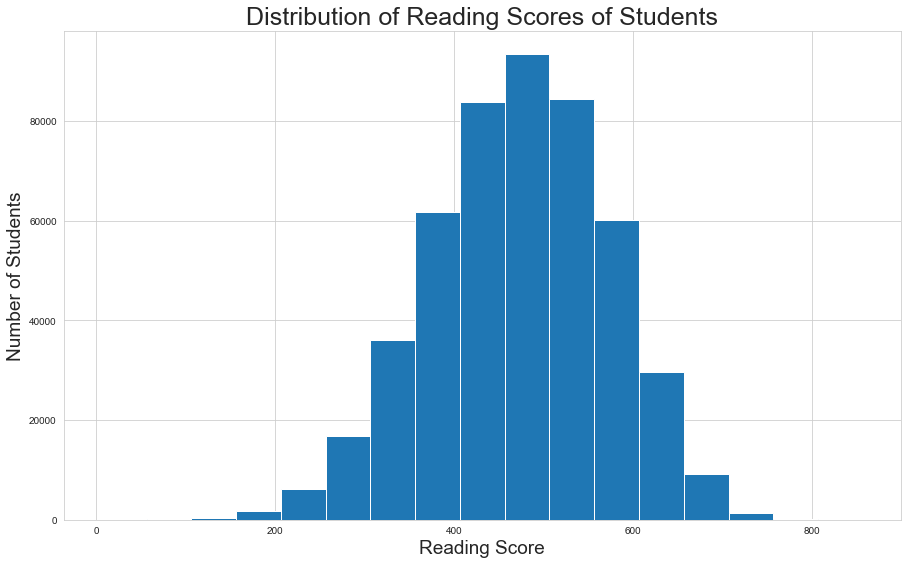

In [101]:
# Average Score

binsize = 50
bins = np.arange(df['avg_reading_score'].min(), df['avg_reading_score'].max() + binsize, binsize)

plt.figure(figsize = [15, 9])
plt.hist(data = df, x = 'avg_reading_score', bins = bins, color = base_color)
plt.title('Distribution of Reading Scores of Students', size = 25)
plt.xlabel('Reading Score', fontsize = 19)
plt.ylabel('Number of Students', fontsize = 19);

***The average Score of Reading is normally distributed with a peak at around 500.***

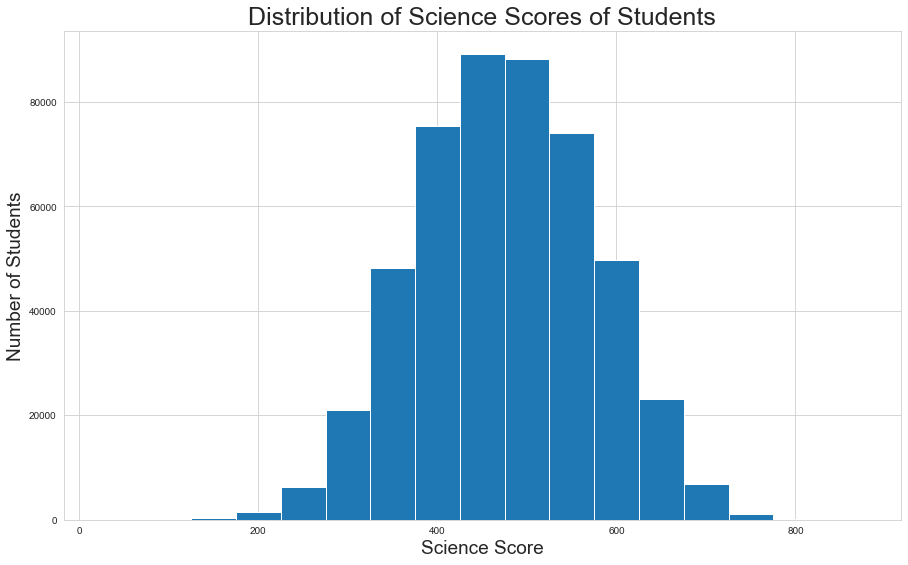

In [102]:
# Average Score
binsize = 50
bins = np.arange(df['avg_science_score'].min(), df['avg_science_score'].max() + binsize, binsize)

plt.figure(figsize = [15, 9])
plt.hist(data = df, x = 'avg_science_score', bins = bins, color = base_color)
plt.title('Distribution of Science Scores of Students', size = 25)
plt.xlabel('Science Score', fontsize = 19)
plt.ylabel('Number of Students', fontsize = 19);

***The average Score of Science is normally distributed with a peak at around 500.***

### *Proportion of Gender*

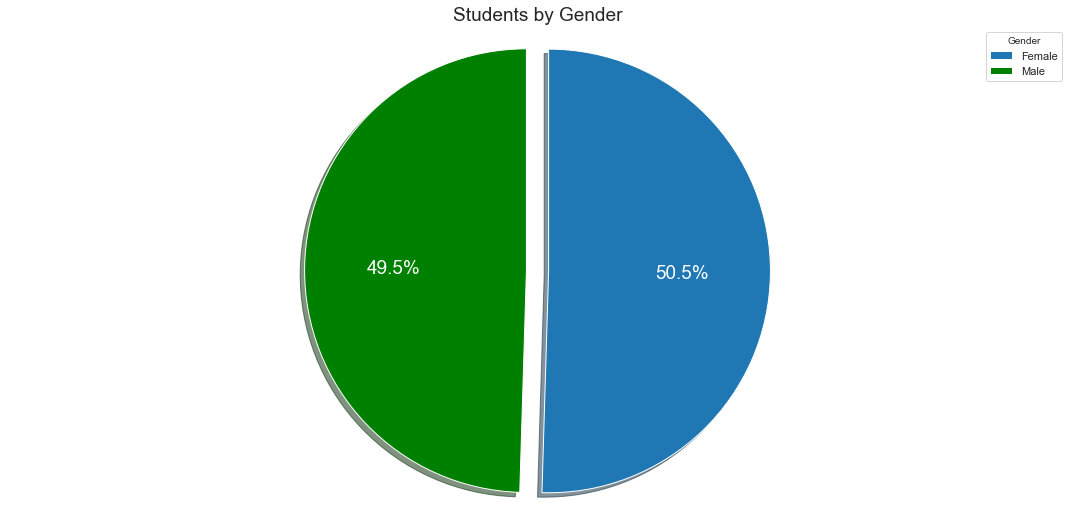

In [103]:
# Gender distribution
explode = [0, 0.1]

plt.figure(figsize = (19,9))
labels = ['Male', 'Female']

plt.pie(df['gender'].value_counts(), labels = df['gender'].value_counts().index, startangle = 90, autopct = '%1.1f%%'
        , counterclock = False, textprops={'color':"w", 'fontsize': 19}, shadow = True, explode = explode, colors = [base_color, 'green'])

plt.legend(title = 'Gender', prop = {'size': 11}, loc = 1)
plt.axis('equal')
plt.title('Students by Gender', fontsize = 19);

In [104]:
print('Male Students: {:.3f}%'.format(df['gender'].value_counts()['Male'] / df.shape[0]))
print('Female Students: {:.3f}%'.format(df['gender'].value_counts()['Female'] / df.shape[0]))


Male Students: 0.495%
Female Students: 0.505%


### *Countries with high number of students participated.*

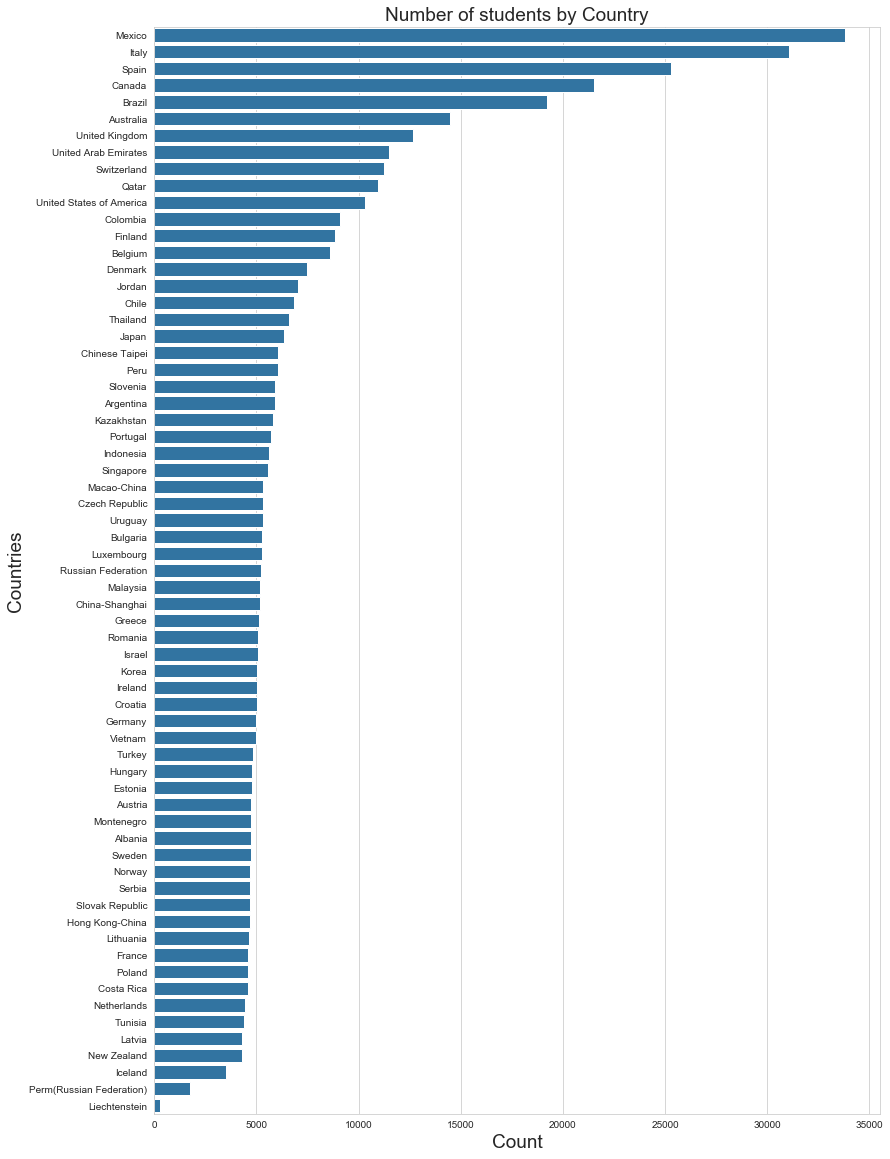

In [105]:
order = df['country'].value_counts().index

plt.figure(figsize = [13,20])
sb.countplot(data = df, y = 'country', order = order, color = base_color)
plt.title('Number of students by Country', size = 19);
plt.xlabel('Count', fontsize = 19);
plt.ylabel('Countries', fontsize = 19);

Text(0.5, 0, 'Count')

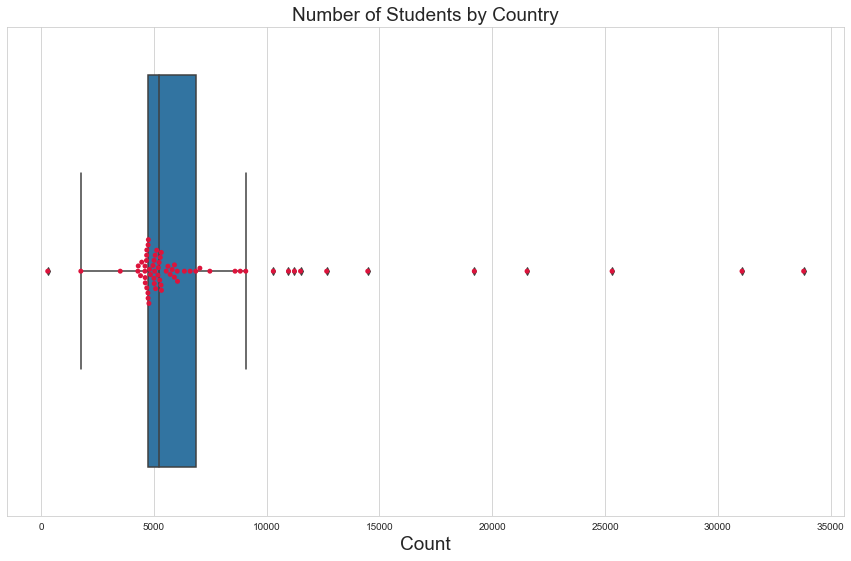

In [106]:
plt.figure(figsize = (15,9))

sb.boxplot(df['country'].value_counts(), color = base_color)
sb.swarmplot(df['country'].value_counts(), color = 'crimson')

plt.title('Number of Students by Country', size = 19);
plt.xlabel('Count', fontsize = 19)

**Most countries have between 5000 to 7000 students taking the survey. The boxplot also shows that there are a few outliers. For example, Mexico and Italy have over 30,000 students and Liechtenstein has well below 1000 students.**

### *Attitude of the Students*

In [107]:
df[['motivation', 'anxiety','interest', 'work_ethic', 'behavior', 'self']].describe()

motivation        anxiety       interest     work_ethic  \
count  312694.000000  307425.000000  311611.000000  306731.000000   
mean        2.988886       2.495314       2.445061       2.866265   
std         0.740661       0.683011       0.779287       0.577228   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.500000       2.000000       2.000000       2.555556   
50%         3.000000       2.400000       2.500000       2.888889   
75%         3.500000       3.000000       3.000000       3.222222   
max         4.000000       4.000000       4.000000       4.000000   

            behavior           self  
count  307112.000000  306931.000000  
mean        1.677428       2.482890  
std         0.557671       0.742968  
min         1.000000       1.000000  
25%         1.250000       2.000000  
50%         1.500000       2.400000  
75%         1.875000       3.000000  
max         4.000000       4.000000

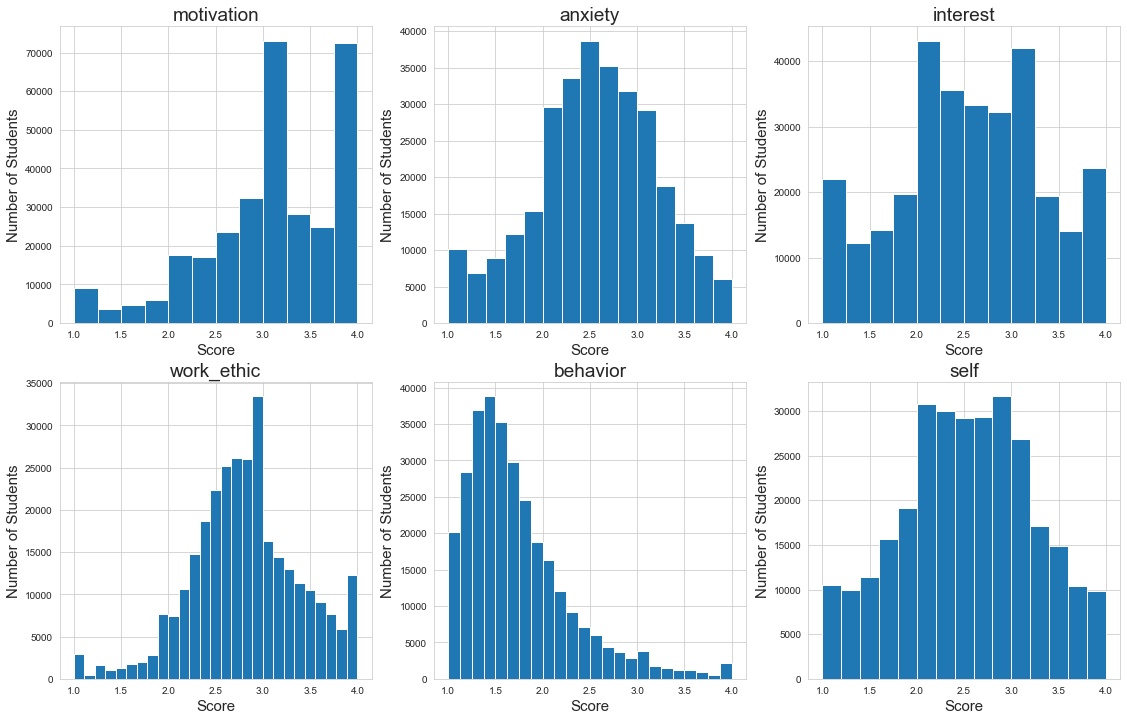

In [108]:
# Attitude
attitude = ['motivation', 'anxiety','interest', 'work_ethic', 'behavior', 'self']

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = [19,12])

binsizes = [1/4, 1/5, 1/4, 1/9, 1/8, 1/5]

ax = ax.flatten()

i = 0
for feature in attitude:
    bins = np.arange(min(df[feature]), max(df[feature]) + binsizes[i], binsizes[i])
    ax[i].hist(data = df, x = feature, bins = bins)
    ax[i].set_xlabel('Score', fontsize = 15)
    ax[i].set_ylabel('Number of Students', fontsize = 15)
    ax[i].set_title(feature, fontsize = 19)
    i += 1

- **Under motivation feature, it looks like the graph is skewed to the left with spikes at points 3-3.25 and 3.75-4.**

- **anxiety is almost normally distributed.**

- **work_ethic is slightly skewed to the left with a spike at around 3 points.**

- **behavior is skewed to the right showing that most students do not take extra actions towards Mathematics such as taking about math with friends, play chess, or computer programming.**

### *Parents attitude towards Maths*

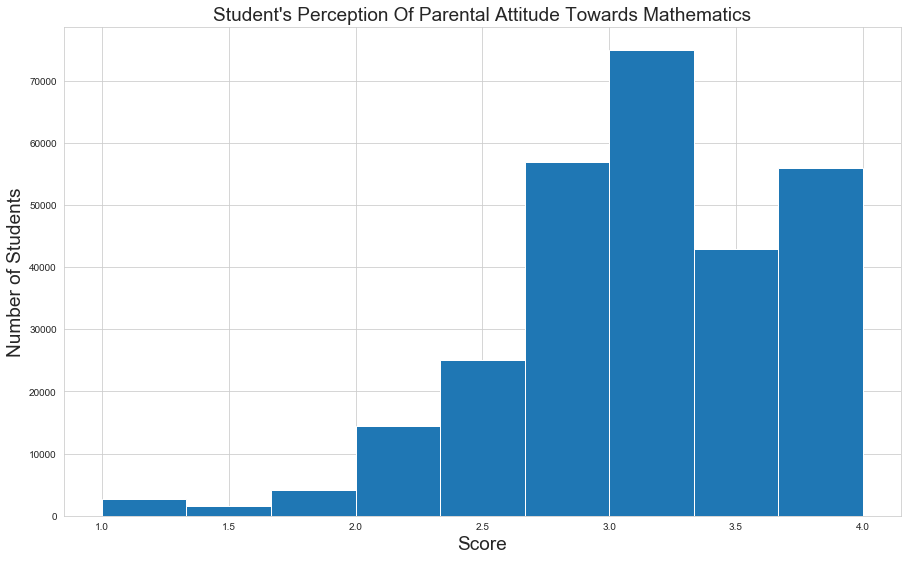

In [109]:
binsize = 1/3
plt.figure(figsize = (15,9))
bins = np.arange(df['parents'].min(), df['parents'].max() + binsize, binsize)

plt.hist(data = df, x = 'parents', bins = bins)
plt.xlabel('Score', fontsize = 19)
plt.ylabel('Number of Students', fontsize = 19)
plt.title('Student\'s Perception Of Parental Attitude Towards Mathematics', fontsize = 19);

***The graph is slightly skewed to the left showing that most students have a positive view of their parent's attitudes towards Mathematics.***

### What if we now just take a look at just the top percentile of students and see how gender is distributed?

In [110]:
df_75 = df.query('avg_math_score>= avg_math_score.quantile(.75)')
df_90 = df.query('avg_math_score>= avg_math_score.quantile(.90)')
df_95 = df.query('avg_math_score>= avg_math_score.quantile(.95)')
df_99 = df.query('avg_math_score>= avg_math_score.quantile(.99)')

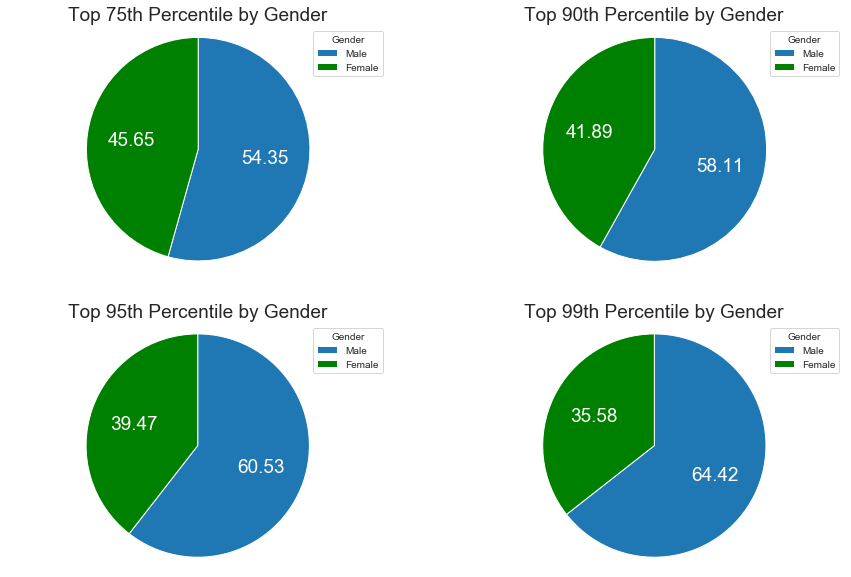

In [111]:
percent = [75, 90, 95, 99]
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))

ax = ax.flatten()

for i in range(4):
    plt.sca(ax[i])
    df_i = eval('df_' + str(percent[i]))
    plt.pie(df_i['gender'].value_counts(), labels = df_i['gender'].value_counts().index, startangle = 90,
            counterclock = False, autopct = '%.2f', colors = [base_color, 'green'], textprops={'color':"w", 'fontsize': 19})
    plt.axis('equal')
    plt.title('Top ' + str(percent[i]) + 'th Percentile by Gender', fontsize = 19)
    plt.legend(title = "Gender", loc = 1)

***This is actually very interesting to see. Notice how as the top nth percentile increases, the gender gap increases as well i.e. Male is increasing as the percentile increases.***

## BIVARIATE EXPLORATION ###

### *Gender by Each Country*

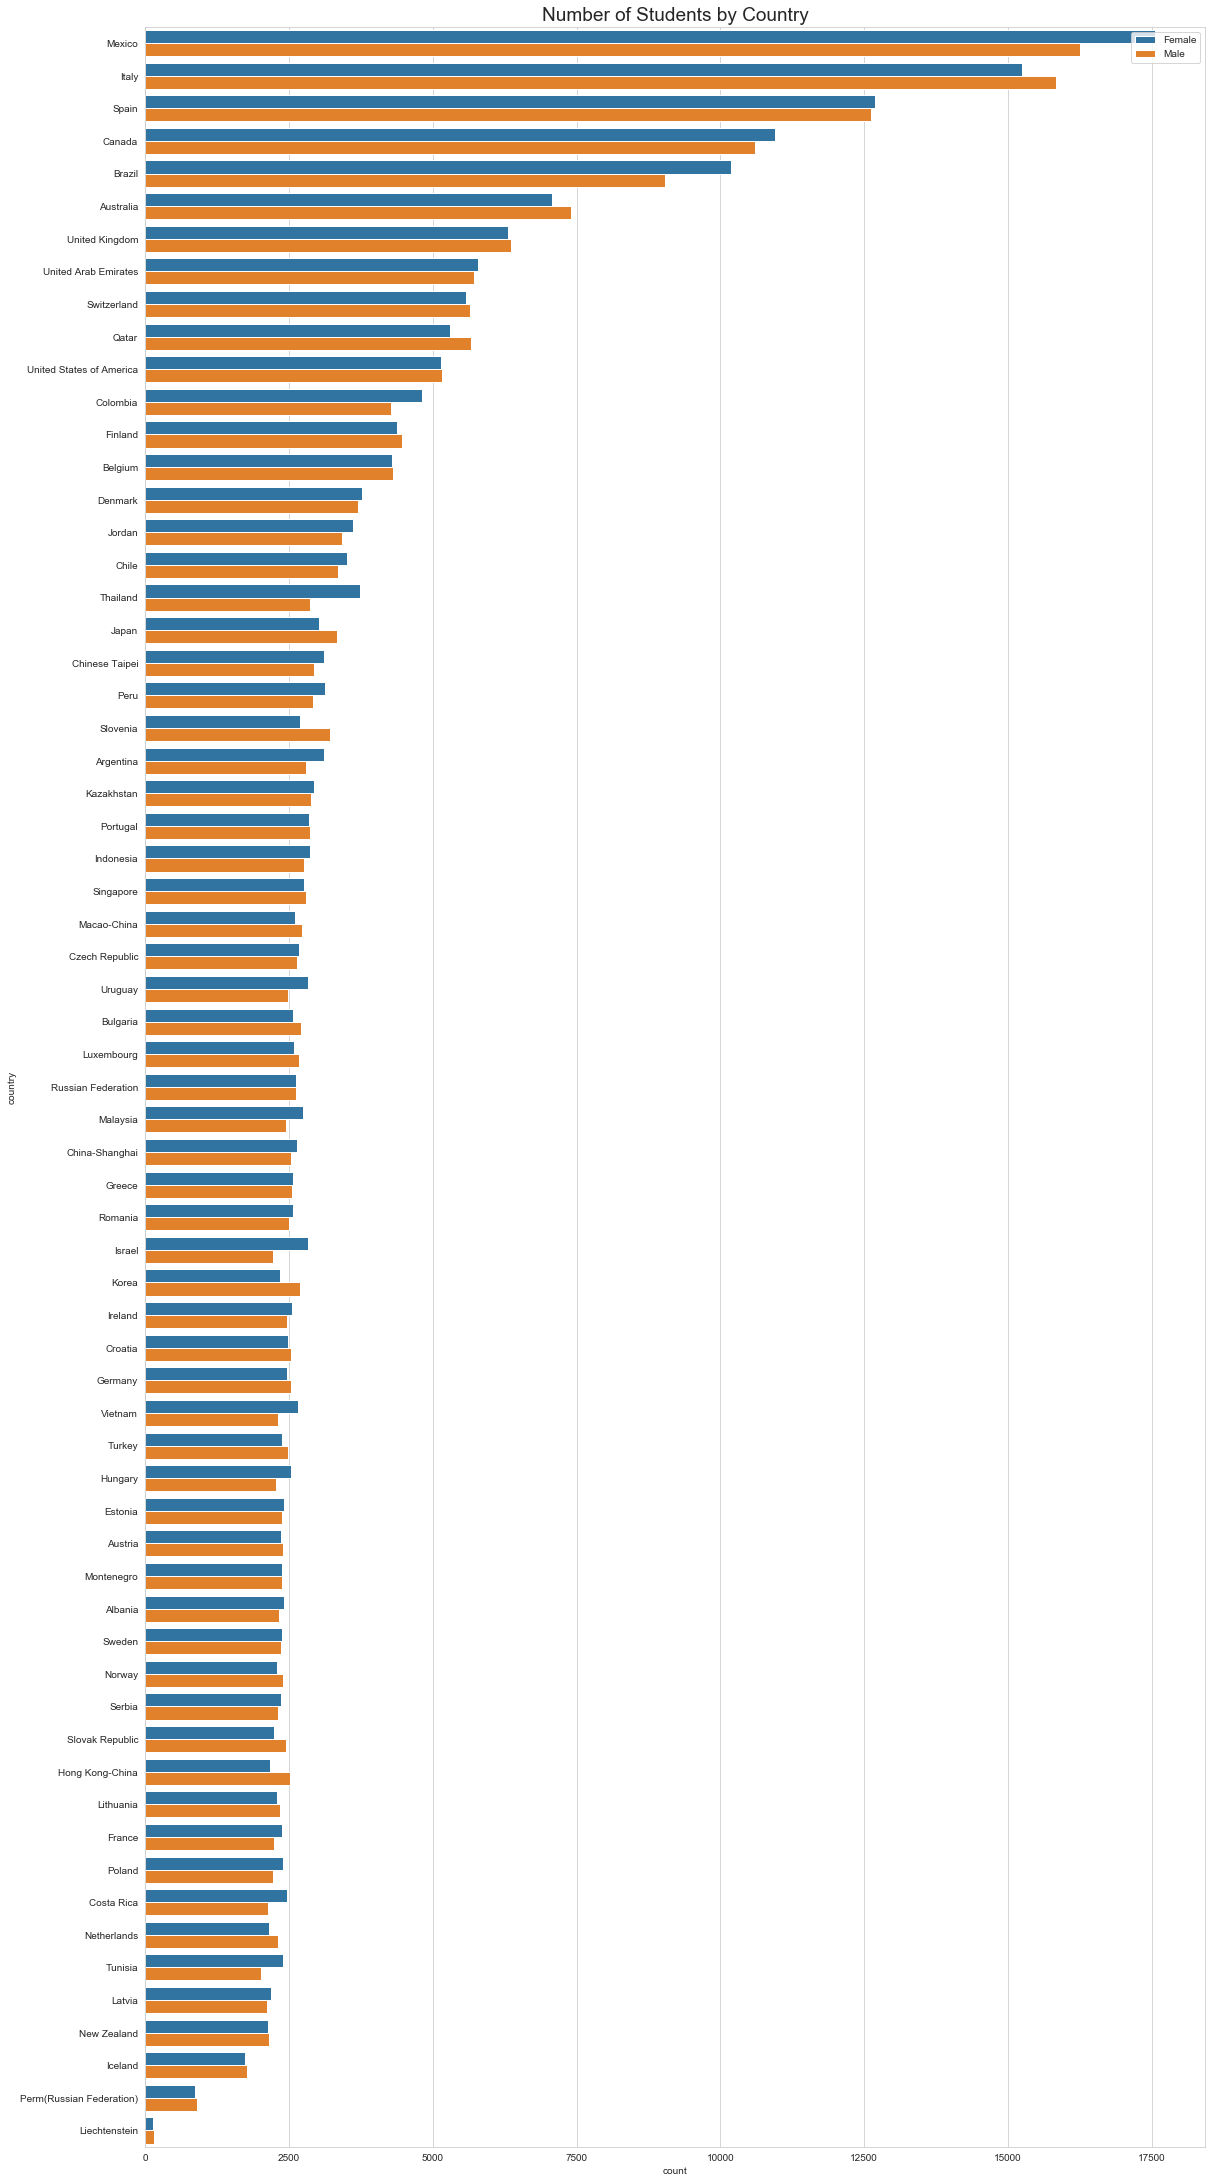

In [112]:
order = df['country'].value_counts().index

plt.figure(figsize = [19,39])
sb.countplot(data = df, y = 'country', order = order, hue = 'gender')
plt.title('Number of Students by Country',size = 19);
plt.legend(loc = 1);

***While most countries show an almost 50/50 split between gender, there are some countries like Mexico, Thailand and Israel that show an very uneven split.***

In [113]:
country = df['country'].unique().tolist()
country.sort()

In [114]:
female = df.query('gender == "Female"').groupby('country').size()
male = df.query('gender == "Male"').groupby('country').size()

In [115]:
# Checking if index matches for all
country == female.index.tolist() == male.index.tolist()

True

In [116]:
gender_df = pd.DataFrame({'country': country, 'female': female.values,'male':male.values})

In [117]:
gender_df['total_pop'] = gender_df['female'] + gender_df['male']

In [118]:
gender_df['female_percent'] = 100 * (gender_df['female'] / gender_df['total_pop'])
gender_df['male_percent'] = 100 * (gender_df['male'] / gender_df['total_pop'])
gender_df['diff_percent'] = (np.absolute((gender_df['female_percent'] - gender_df['male_percent'])))

In [119]:
gender_df.head(10)

country  female   male  total_pop  female_percent  male_percent  \
0         Albania    2416   2327       4743       50.938225     49.061775   
1       Argentina    3113   2795       5908       52.691266     47.308734   
2       Australia    7075   7406      14481       48.857123     51.142877   
3         Austria    2357   2398       4755       49.568875     50.431125   
4         Belgium    4287   4310       8597       49.866232     50.133768   
5          Brazil   10175   9029      19204       52.983753     47.016247   
6        Bulgaria    2578   2704       5282       48.807270     51.192730   
7          Canada   10943  10601      21544       50.793724     49.206276   
8           Chile    3512   3344       6856       51.225204     48.774796   
9  China-Shanghai    2637   2540       5177       50.936836     49.063164   

   diff_percent  
0      1.876450  
1      5.382532  
2      2.285754  
3      0.862250  
4      0.267535  
5      5.967507  
6      2.385460  
7      1.587449  
8      2.450408  
9      1.873672

In [120]:
gender_df.describe()

female          male     total_pop  female_percent  male_percent  \
count     65.000000     65.000000     65.000000       65.000000     65.000000   
mean    3770.215385   3698.861538   7469.076923       50.378618     49.621382   
std     3107.837037   3025.093614   6125.192028        2.035960      2.035960   
min      138.000000    155.000000    293.000000       45.660633     43.445353   
25%     2378.000000   2358.000000   4743.000000       49.230154     48.635976   
50%     2637.000000   2617.000000   5231.000000       50.211149     49.788851   
75%     3615.000000   3344.000000   6856.000000       51.364024     50.769846   
max    17553.000000  16253.000000  33806.000000       56.554647     54.339367   

       diff_percent  
count     65.000000  
mean       2.978123  
std        2.855713  
min        0.042159  
25%        0.862250  
50%        1.889100  
75%        4.617358  
max       13.109295

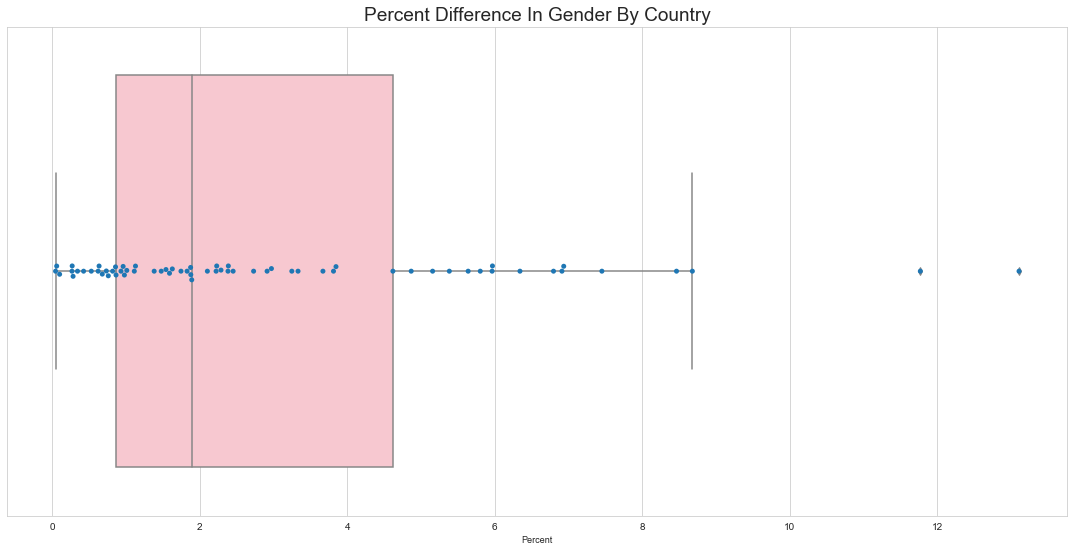

In [121]:
# Plotting difference
plt.figure(figsize = (19, 9))
sb.swarmplot(data = gender_df, x = 'diff_percent', color = base_color)
sb.boxplot(data = gender_df, x = 'diff_percent', color = 'pink')
plt.title('Percent Difference In Gender By Country', fontsize = 19)
plt.xlabel('Percent', fontsize = 9);

**Almost half of the countries have a difference in gender of about 2% and lower for students. It even looks like 2 countries have a difference of more than 10%. Why is there such a large gap in gender for students taking these exams for these countries?**

In [122]:
gender_df.sort_values('diff_percent', ascending = False).head(10)

country  female  male  total_pop  female_percent  male_percent  \
57         Thailand    3736  2870       6606       56.554647     43.445353   
26           Israel    2825  2230       5055       55.885262     44.114738   
53         Slovenia    2699  3212       5911       45.660633     54.339367   
58          Tunisia    2390  2017       4407       54.231904     45.768096   
21  Hong Kong-China    2161  2509       4670       46.274090     53.725910   
31            Korea    2342  2691       5033       46.532883     53.467117   
12       Costa Rica    2460  2142       4602       53.455020     46.544980   
64          Vietnam    2648  2311       4959       53.397862     46.602138   
63          Uruguay    2826  2489       5315       53.170273     46.829727   
5            Brazil   10175  9029      19204       52.983753     47.016247   

    diff_percent  
57     13.109295  
26     11.770524  
53      8.678735  
58      8.463808  
21      7.451820  
31      6.934234  
12      6.910039  
64      6.795725  
63      6.340546  
5       5.967507

**If we take a look at the top 10 countries with the most gender differences, 7 out of 10 countries are female dominated.**

### *Gender By Scores*

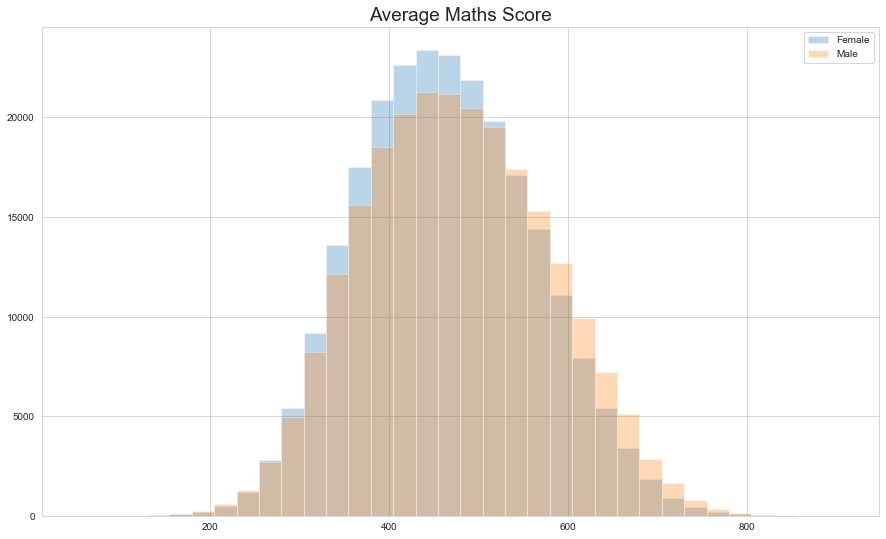

In [123]:
# Plotting the histogram
plt.figure(figsize = [15, 9])
binsize = 25
bins = np.arange(min(df['avg_math_score']), max(df['avg_math_score']) + binsize, binsize)

plt.title('Average Maths Score', fontsize = 19);
plt.hist(data = df.query('gender == "Female"'), x = 'avg_math_score', alpha = .3, bins = bins, label = 'Female')
plt.hist(data = df.query('gender == "Male"'), x = 'avg_math_score', alpha = .3, bins = bins, label = 'Male')
plt.legend();

***The Female students has consistent high scores than the Male students.***

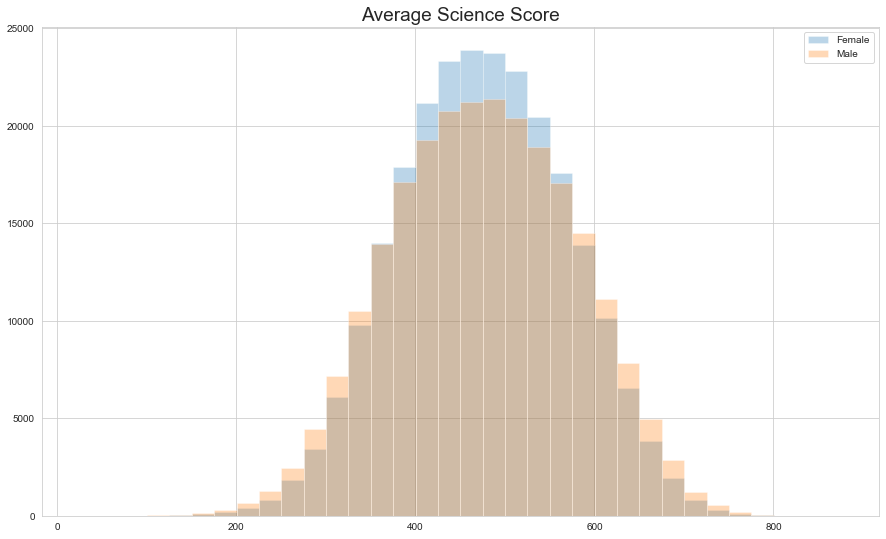

In [124]:
# Plotting the histogram
plt.figure(figsize = [15, 9])
binsize = 25
bins = np.arange(min(df['avg_science_score']), max(df['avg_science_score']) + binsize, binsize)

plt.title('Average Science Score', fontsize = 19);
plt.hist(data = df.query('gender == "Female"'), x = 'avg_science_score', alpha = .3, bins = bins, label = 'Female')
plt.hist(data = df.query('gender == "Male"'), x = 'avg_science_score', alpha = .3, bins = bins, label = 'Male')
plt.legend();

***The Female students has consistent high scores than the Male students.***

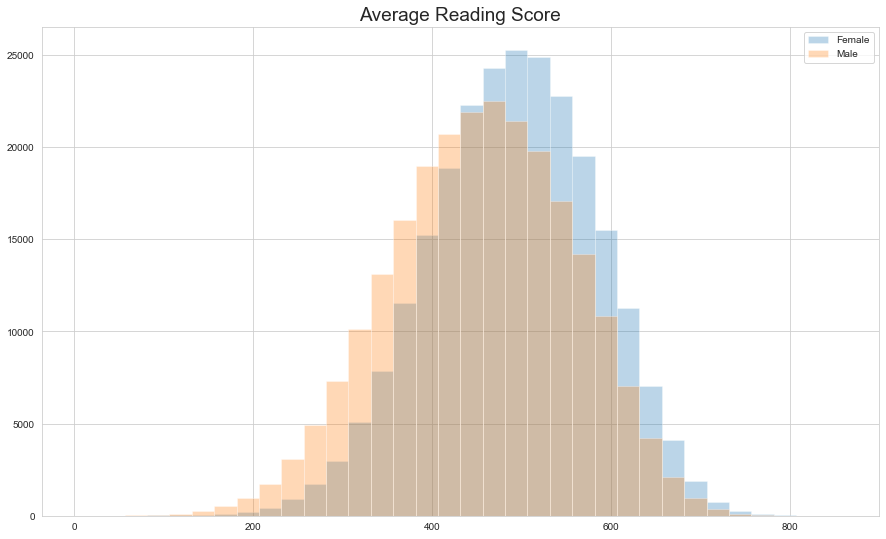

In [125]:
# Plotting the histogram
plt.figure(figsize = [15, 9])
binsize = 25
bins = np.arange(min(df['avg_reading_score']), max(df['avg_reading_score']) + binsize, binsize)

plt.title('Average Reading Score', fontsize = 19);
plt.hist(data = df.query('gender == "Female"'), x = 'avg_reading_score', alpha = .3, bins = bins, label = 'Female')
plt.hist(data = df.query('gender == "Male"'), x = 'avg_reading_score', alpha = .3, bins = bins, label = 'Male')
plt.legend();

***The Female students has consistent high scores than the Male students.***

### *Gender By Student's Perception Of Parental Attitude Towards Mathematics*

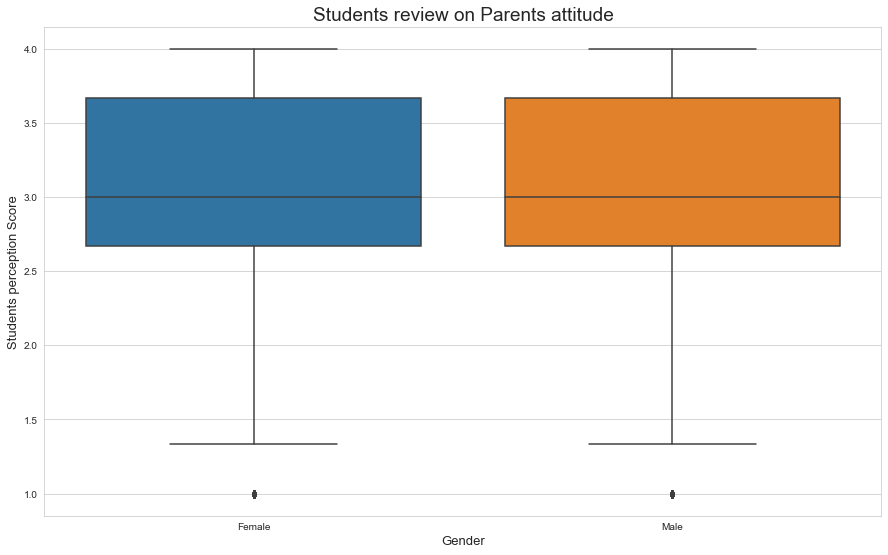

In [126]:
# Plotting box plot of scores
plt.figure(figsize = (15, 9))
sb.boxplot(data = df, y = 'parents', x = 'gender');
plt.xlabel('Gender', fontsize = 13)
plt.ylabel('Students perception Score', fontsize = 13);
plt.title('Students review on Parents attitude', fontsize = 19);

In [127]:
# Checking more on this data and scores
df.query('gender == "Female"').parents.describe(), df.query('gender == "Male"').parents.describe()

(count    158373.000000
 mean          3.036302
 std           0.610329
 min           1.000000
 25%           2.666667
 50%           3.000000
 75%           3.666667
 max           4.000000
 Name: parents, dtype: float64,
 count    153309.000000
 mean          3.097665
 std           0.608550
 min           1.000000
 25%           2.666667
 50%           3.000000
 75%           3.666667
 max           4.000000
 Name: parents, dtype: float64)

**Note that about 5000 less Male students did not answer all the questions under Parental View**

***It looks like the there is only a slight difference in male/female perception of their parent's towards mathematics. For both male and female, the 25%, 50%, and 75% are same.***

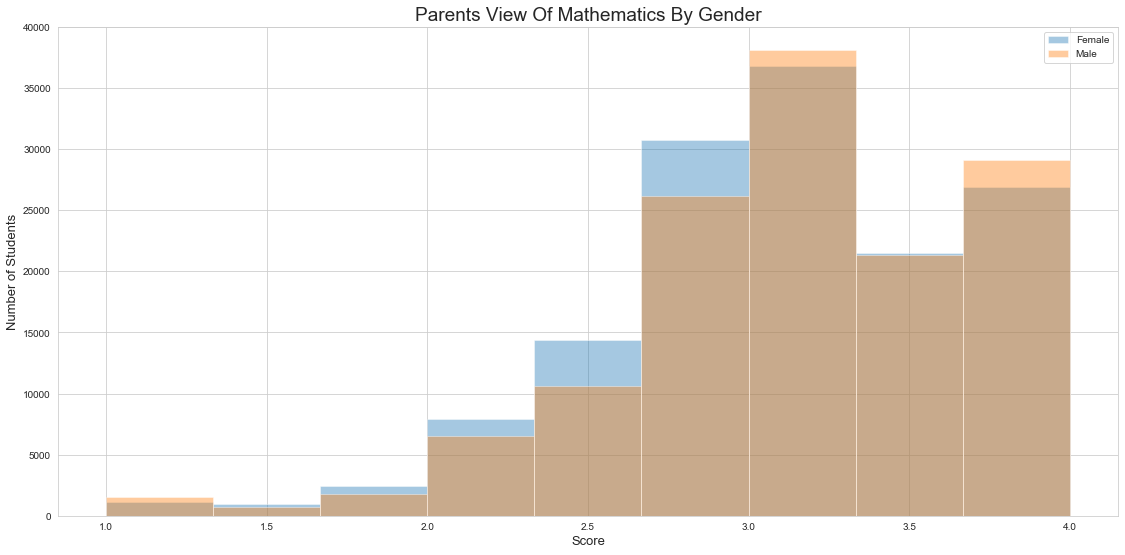

In [128]:
# Plotting histogram on parents view on mathematics by gender
plt.figure(figsize = (19, 9))

plt.hist(df.query('gender == "Female"')['parents'], bins = np.arange(1, 4 + 1/3, 1/3), label = 'Female', alpha = .4)
plt.hist(df.query('gender=="Male"')['parents'], bins = np.arange(1, 4 + 1/3, 1/3), label = 'Male', alpha = .4)
plt.legend();

plt.title('Parents View Of Mathematics By Gender', fontsize = 19)
plt.xlabel('Score', fontsize = 13)
plt.ylabel('Number of Students', fontsize = 13);

***Since there is an uneven amount of female and males students who answered all questions under Parental View, density plot should be more helpful.***

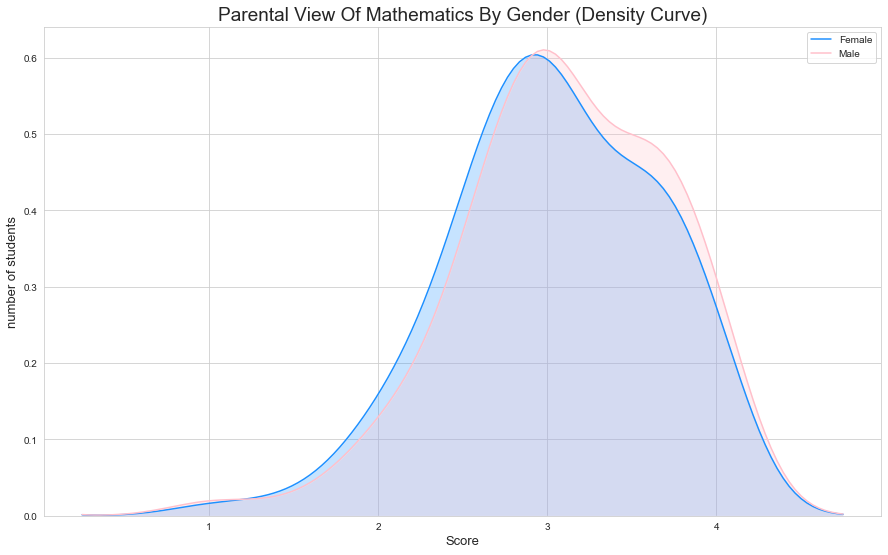

In [129]:
# Plotting density plot
plt.figure(figsize = (15, 9))
sb.kdeplot(data = df.query('gender=="Female"')['parents'], shade = True, color = 'dodgerblue', bw = 1/4, label = 'Female')
sb.kdeplot(data=df.query('gender=="Male"')['parents'], shade = True, color = 'pink', bw = 1/4, label = 'Male')
plt.title('Parental View Of Mathematics By Gender (Density Curve)', fontsize = 19);
plt.xlabel('Score', fontsize = 13)
plt.ylabel('number of students', fontsize = 13);

***We see that only a slight amount of Male Students view their parent's having a higher perception of Mathematics.***

### *Gender By Attitude*

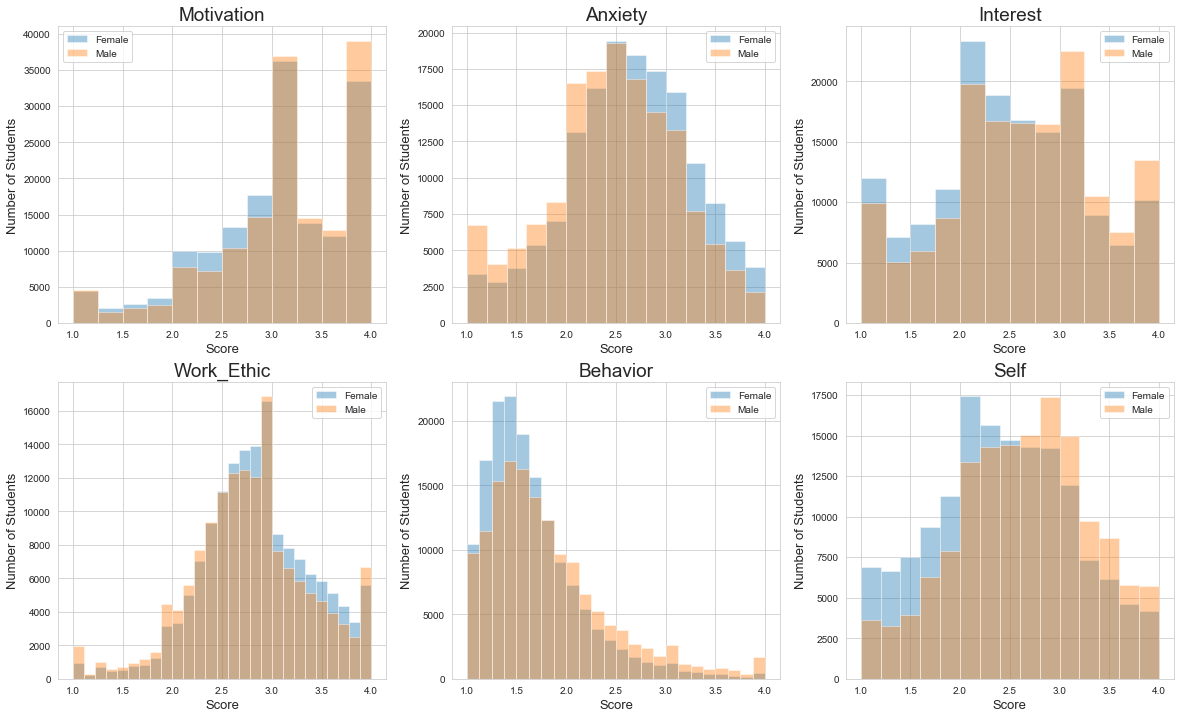

In [130]:
#Attitude

attitude = ['motivation', 'anxiety','interest', 'work_ethic', 'behavior', 'self']

fig, ax= plt.subplots(nrows = 2, ncols = 3, figsize = [20,12])

binsizes=[1/4, 1/5, 1/4, 1/9, 1/8, 1/5]

ax=ax.flatten()

i=0

for feature in attitude:
    bins = np.arange(min(df[feature]), max(df[feature]) + binsizes[i], binsizes[i])
    ax[i].hist(data = df.query('gender == "Female"'), x = feature, bins = bins, label = 'Female', alpha = .4)
    ax[i].hist(data = df.query('gender == "Male"'), x = feature, bins = bins, label = 'Male', alpha = .4)
    
    ax[i].set_xlabel('Score', fontsize = 13)
    ax[i].set_ylabel('Number of Students', fontsize = 13)
    ax[i].set_title(feature.title(), fontsize = 19)
    ax[i].legend()
    i+=1

***Males students have a high score under motivation, interest, and self. Female students seem to score higher under anxiety as well as work_ethic. There is only slight variation between scores of male and female.***

### *Scores By Attitude*

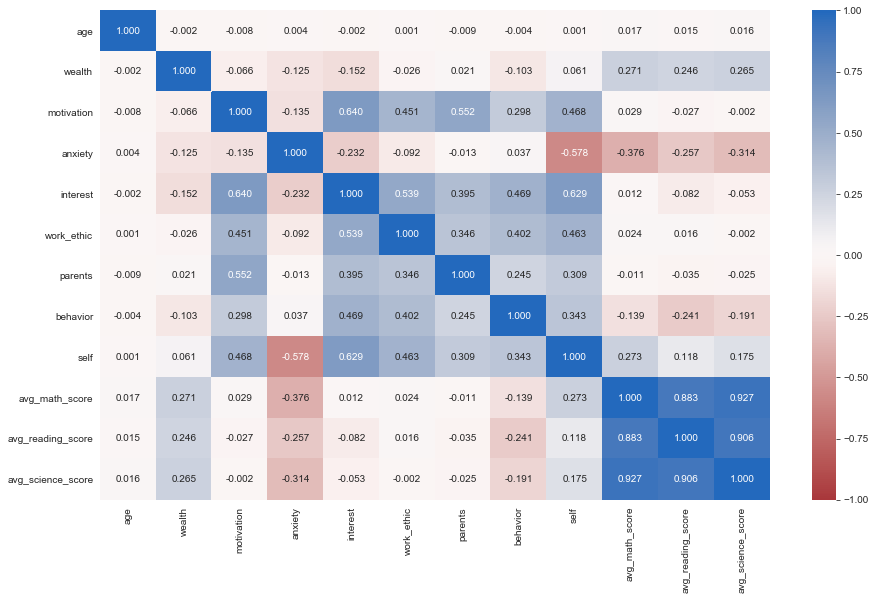

In [131]:
# Checking correlations of variables
plt.figure(figsize = (15, 9))
sb.heatmap(data = df.corr(), center = 0, annot = True, vmin = -1, vmax = 1, fmt = '.3f', cmap = 'vlag_r');

***We can see that there is high correlation between scores of subjects and an significant correlation between attitudes.***

## MULTIVARIATE EXPLORATION

### *Motivation Score By Gender By Country*

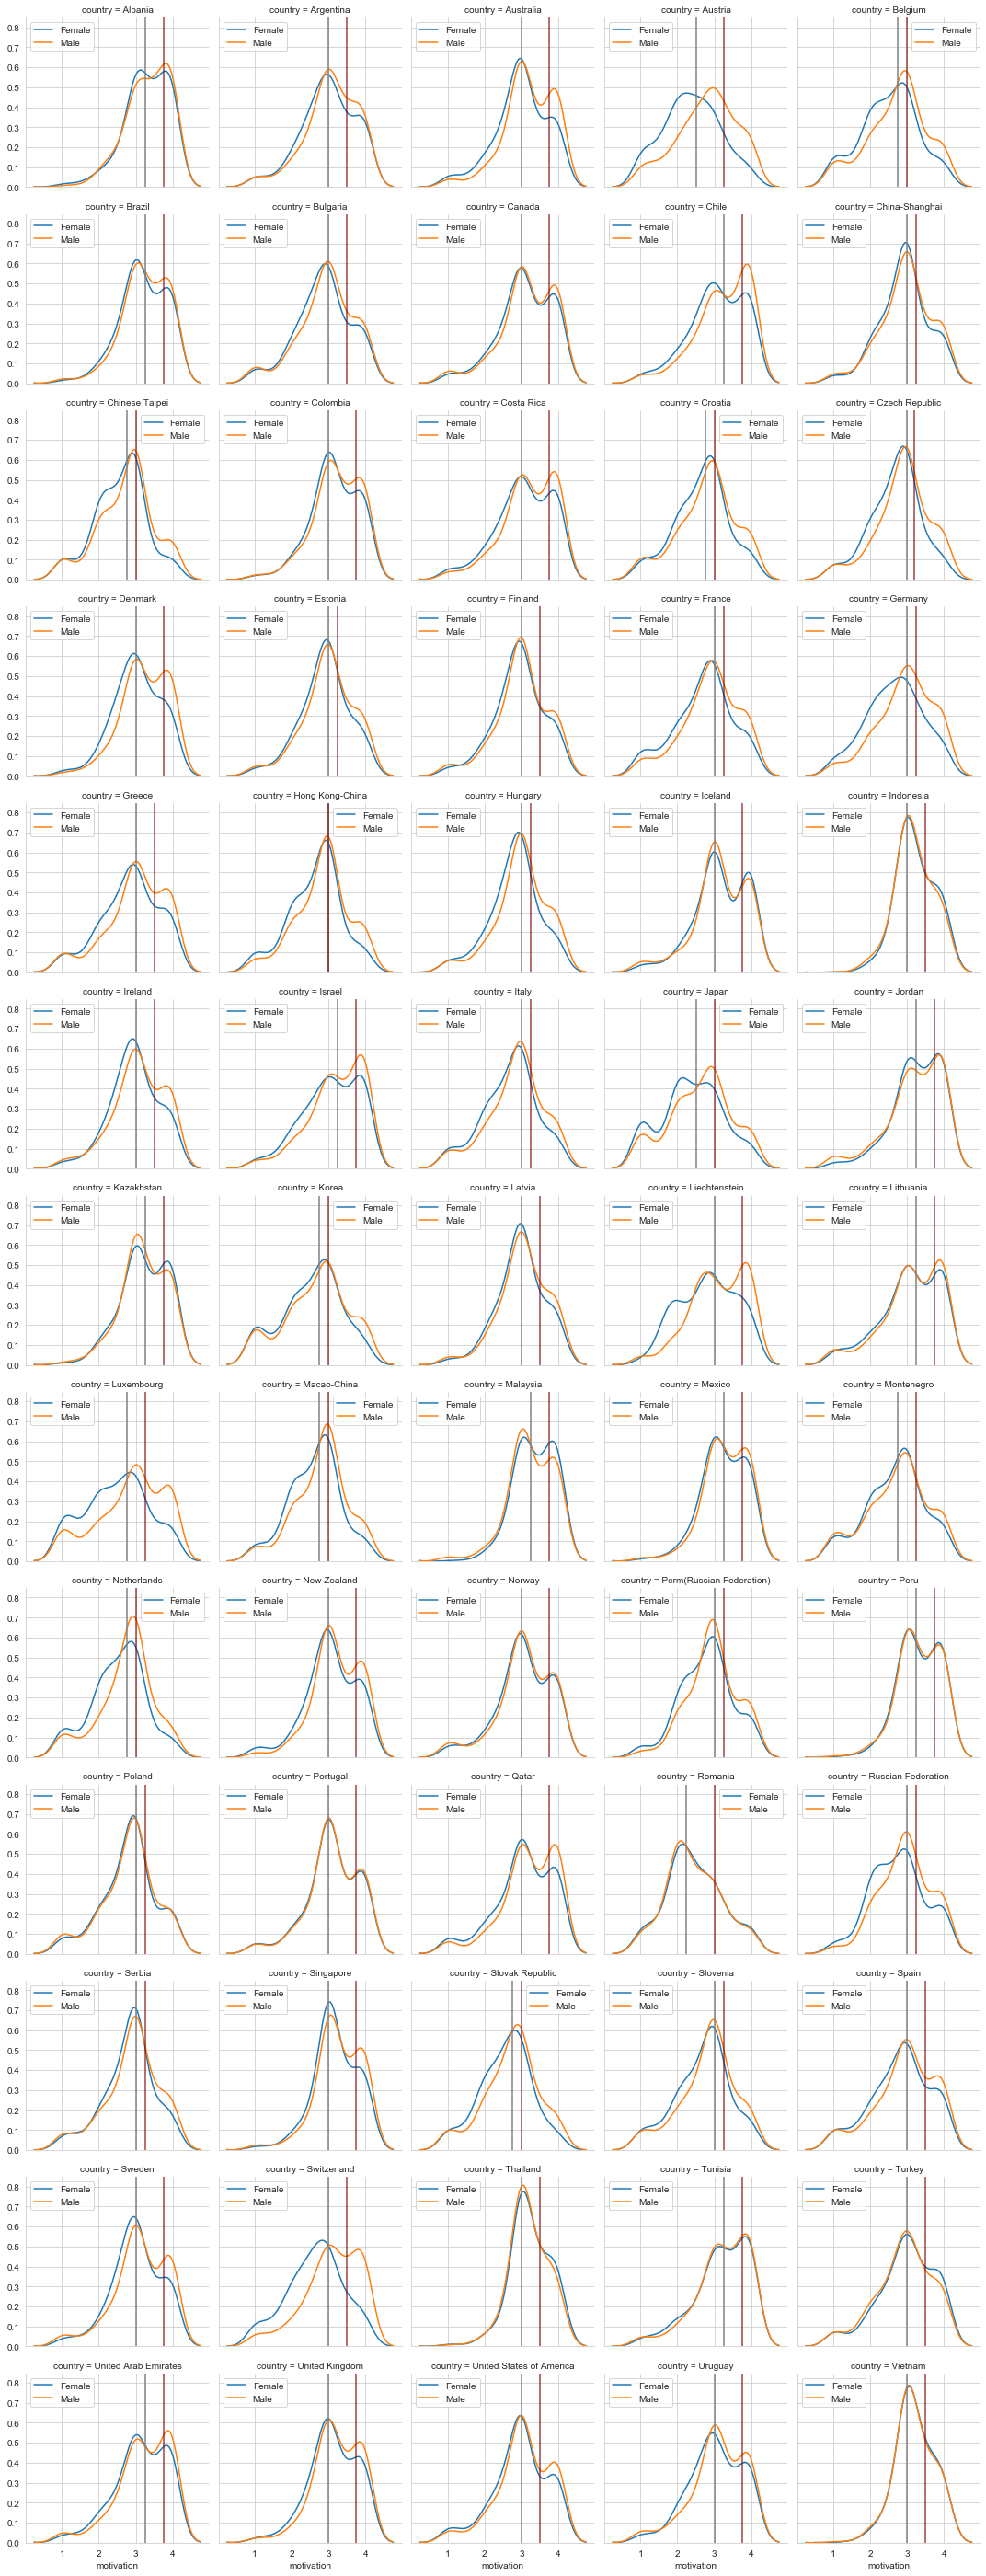

In [132]:
# Creating density plot to check between scores and countries and gender
g = sb.FacetGrid(data = df, col = 'country', hue = 'gender', col_wrap = 5)

g.map(sb.kdeplot, 'motivation', bw = 1/4)

for ax, c in zip(g.axes.flat, country):
    ax.axvline(x = df.query('country == @c').motivation.quantile(.5), color = 'grey')
    ax.axvline(x = df.query('country == @c').motivation.quantile(.75), color = 'maroon', alpha = .75)
    
    ax.legend();

***The grey vertical lines shown above shows the 50 percentile motivation score for each country meanwhile the maroon lines depict the 75 percentile. Notice that almost all countries show the male students outweighing female students in motivation scores. This shows that male students are more motivated in some countries to their studies than females.***

### *Anxiety Score By Gender By Country*

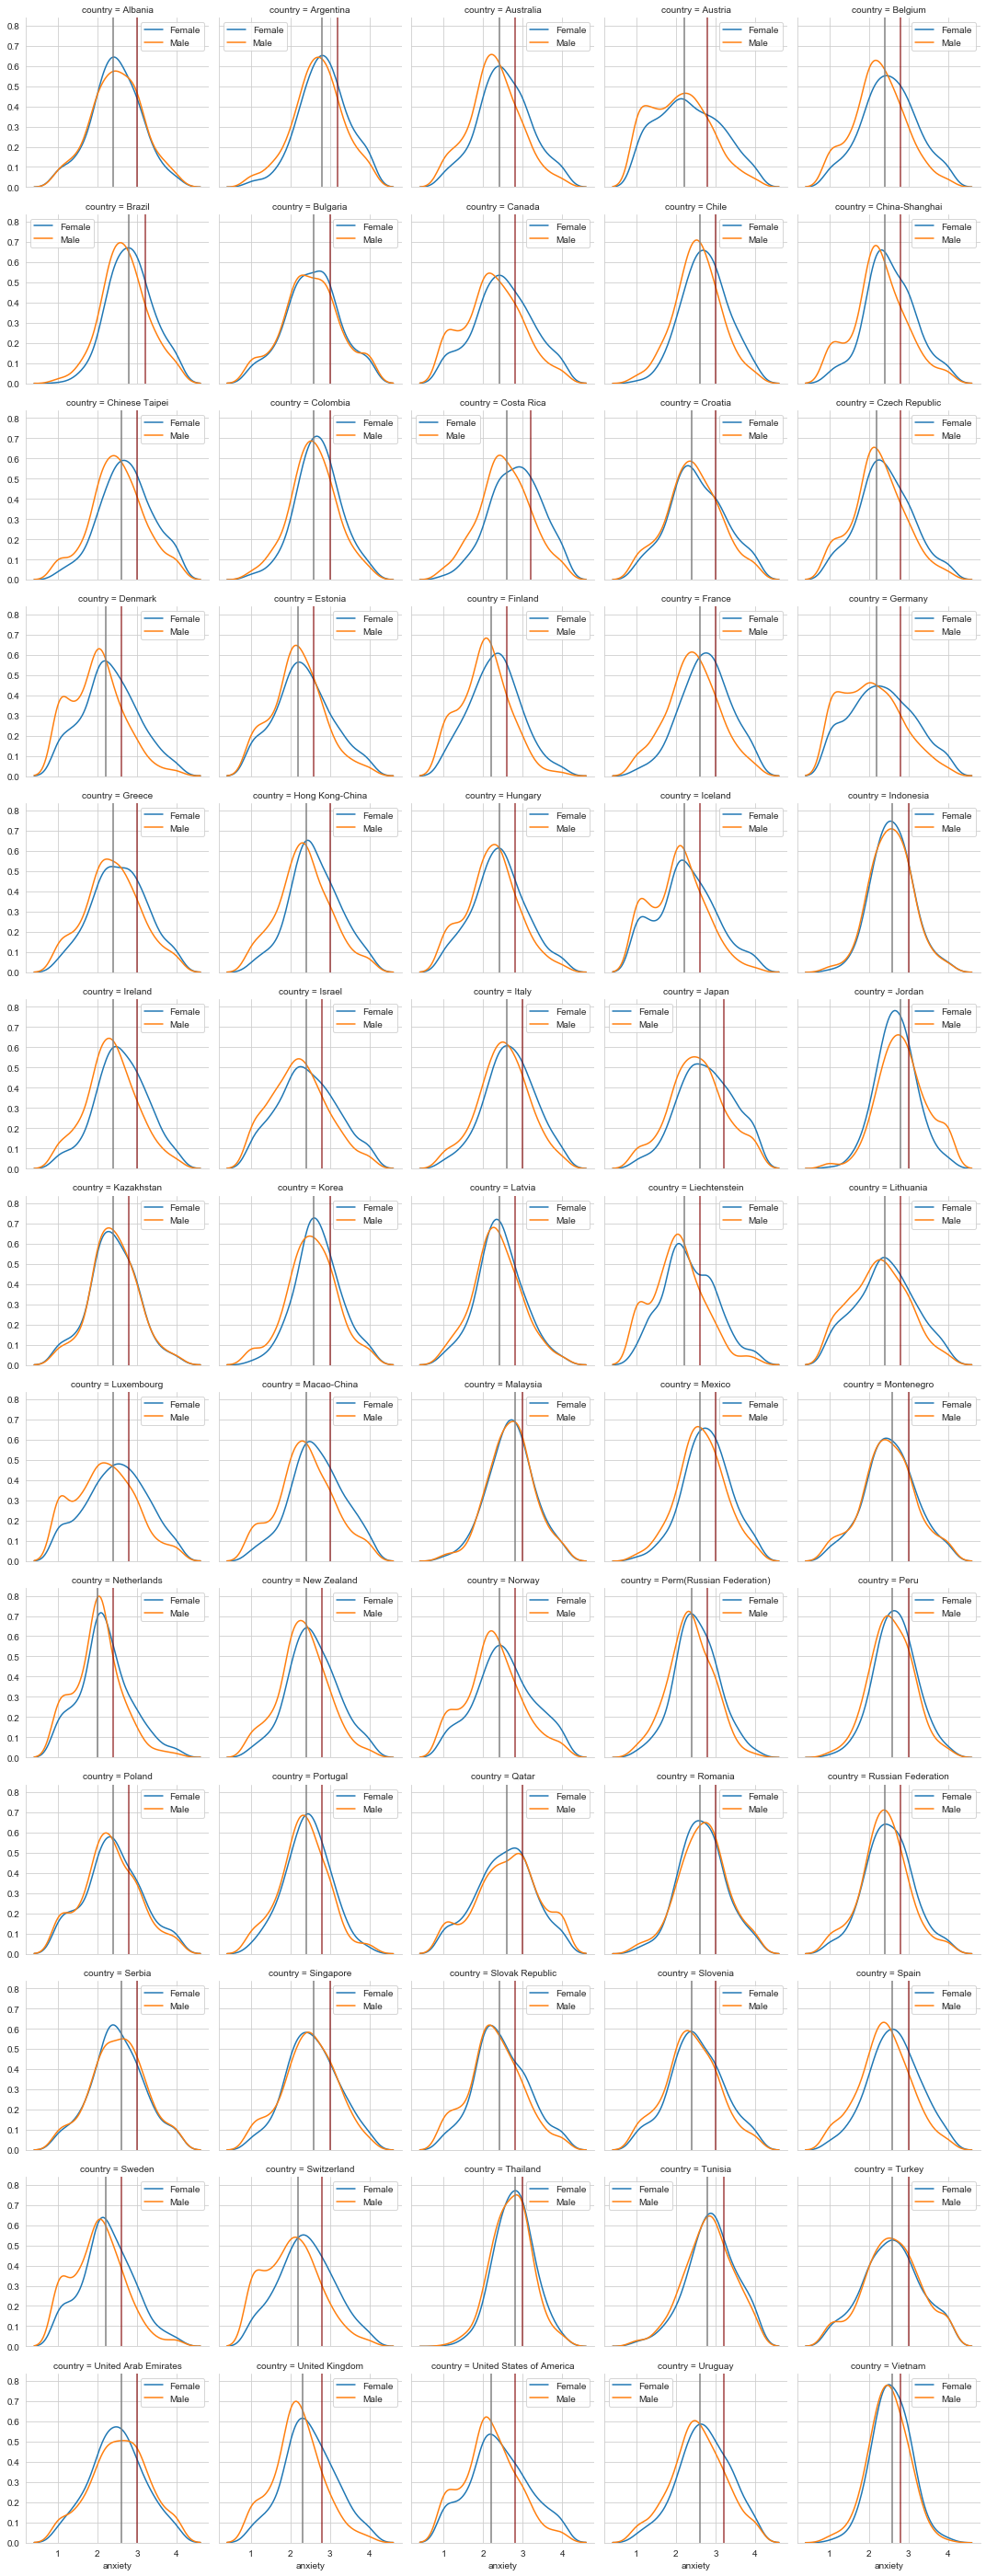

In [133]:
g = sb.FacetGrid(data = df, col = 'country', hue = 'gender', col_wrap = 5)
g.map(sb.kdeplot, 'anxiety', bw = 1/5)

for ax, c in zip(g.axes.flat, country):
    ax.axvline(x = df.query('country==@c').anxiety.quantile(.5), color = 'grey')
    ax.axvline(x = df.query('country==@c').anxiety.quantile(.75), color = 'maroon', alpha = .75)
    ax.legend();

***Almost all of the countries show Males have a higher than average or similar axienty score compared to their females but in some countries females have more anxiety than male mainly in countries where most females are prevented from those.***

### *Interest Score By Gender By Country*

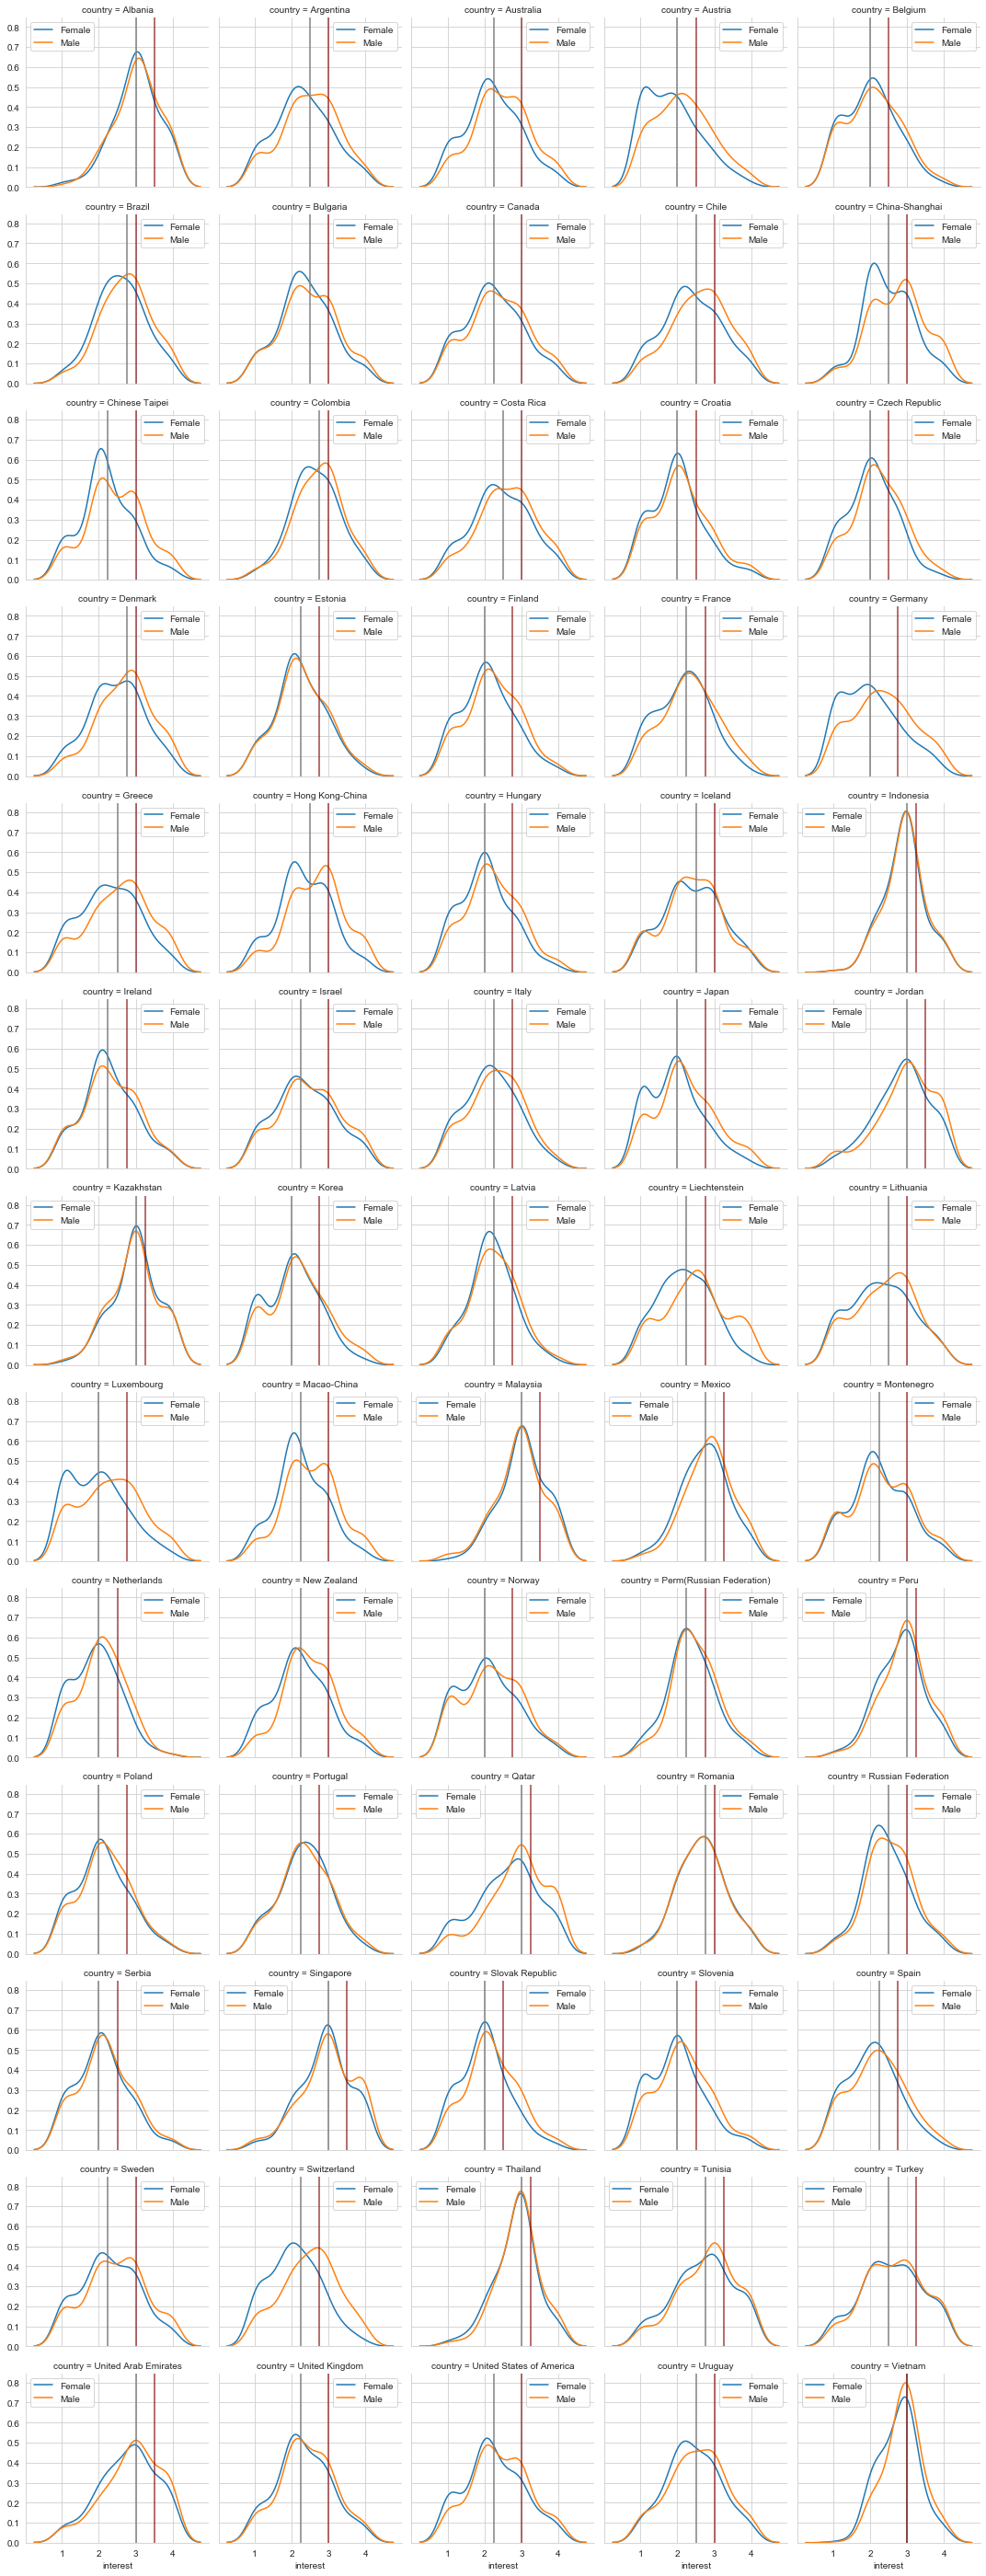

In [134]:
g = sb.FacetGrid(data = df, col = 'country', hue = 'gender', col_wrap = 5)
g.map(sb.kdeplot, 'interest', bw = 1/4)

for ax, c in zip(g.axes.flat, country):
    ax.axvline(x = df.query('country==@c').interest.quantile(.5), color = 'grey')
    ax.axvline(x = df.query('country==@c').interest.quantile(.75), color = 'maroon', alpha = .75)
    ax.legend();

***Females interest scores are higher in developed countries as compare to the countries where females still lack some major rights.***

### *Work Ethic Score By Gender By Country*

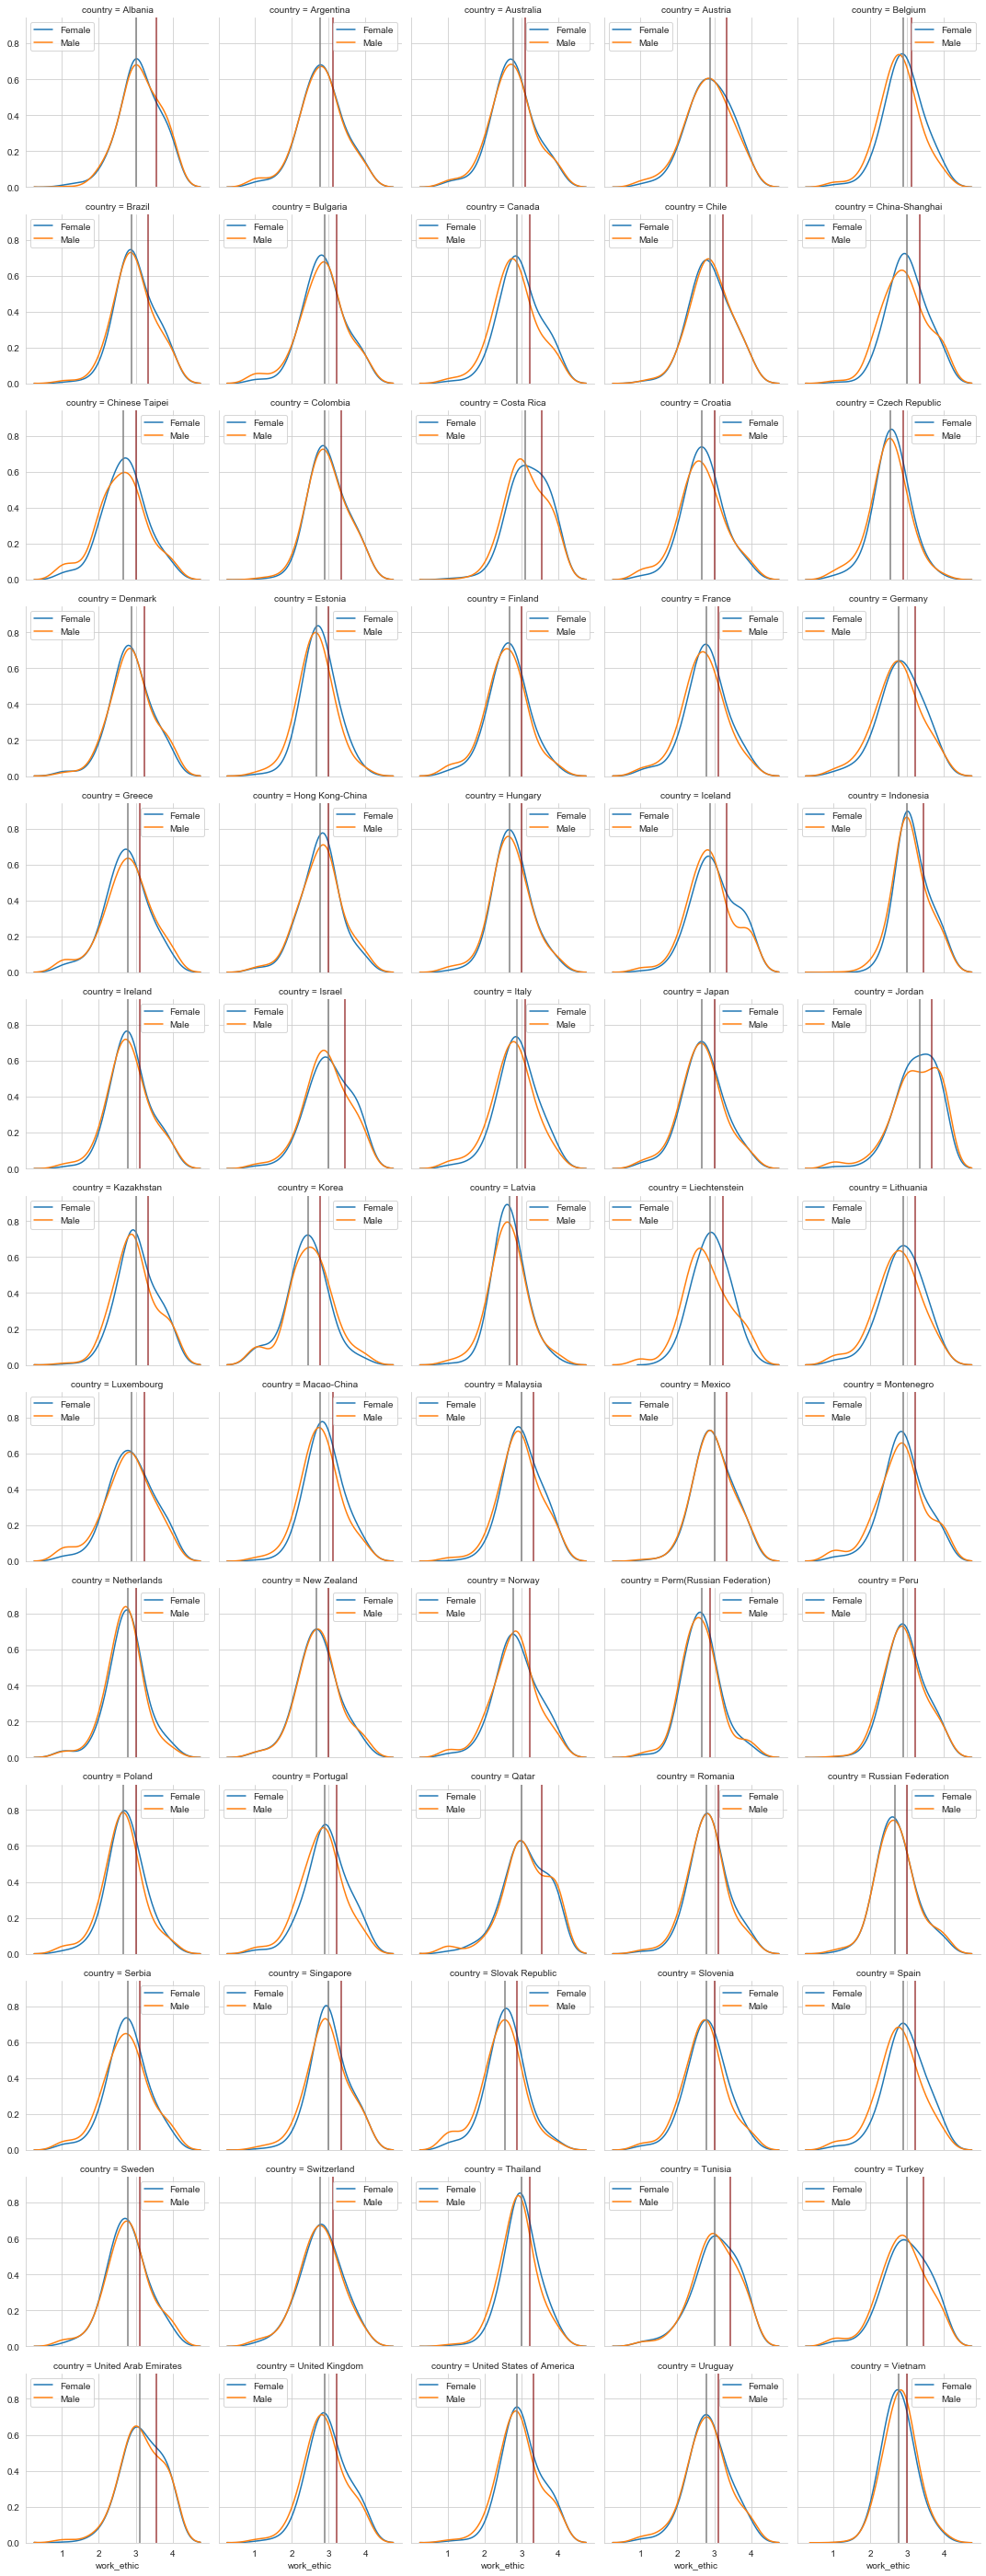

In [135]:
g = sb.FacetGrid(data = df, col = 'country', hue = 'gender', col_wrap = 5)
g.map(sb.kdeplot, 'work_ethic', bw = 1/4)

for ax, c in zip(g.axes.flat, country):
    ax.axvline(x = df.query('country==@c').work_ethic.quantile(.5), color = 'grey')
    ax.axvline(x = df.query('country==@c').work_ethic.quantile(.75), color = 'maroon', alpha = .75)
    ax.legend();

***Under Work Ethic, the females seem to score higher (or about the same) in proportion comparted to the males.***

### *Behaviour Score By Gender By Country*

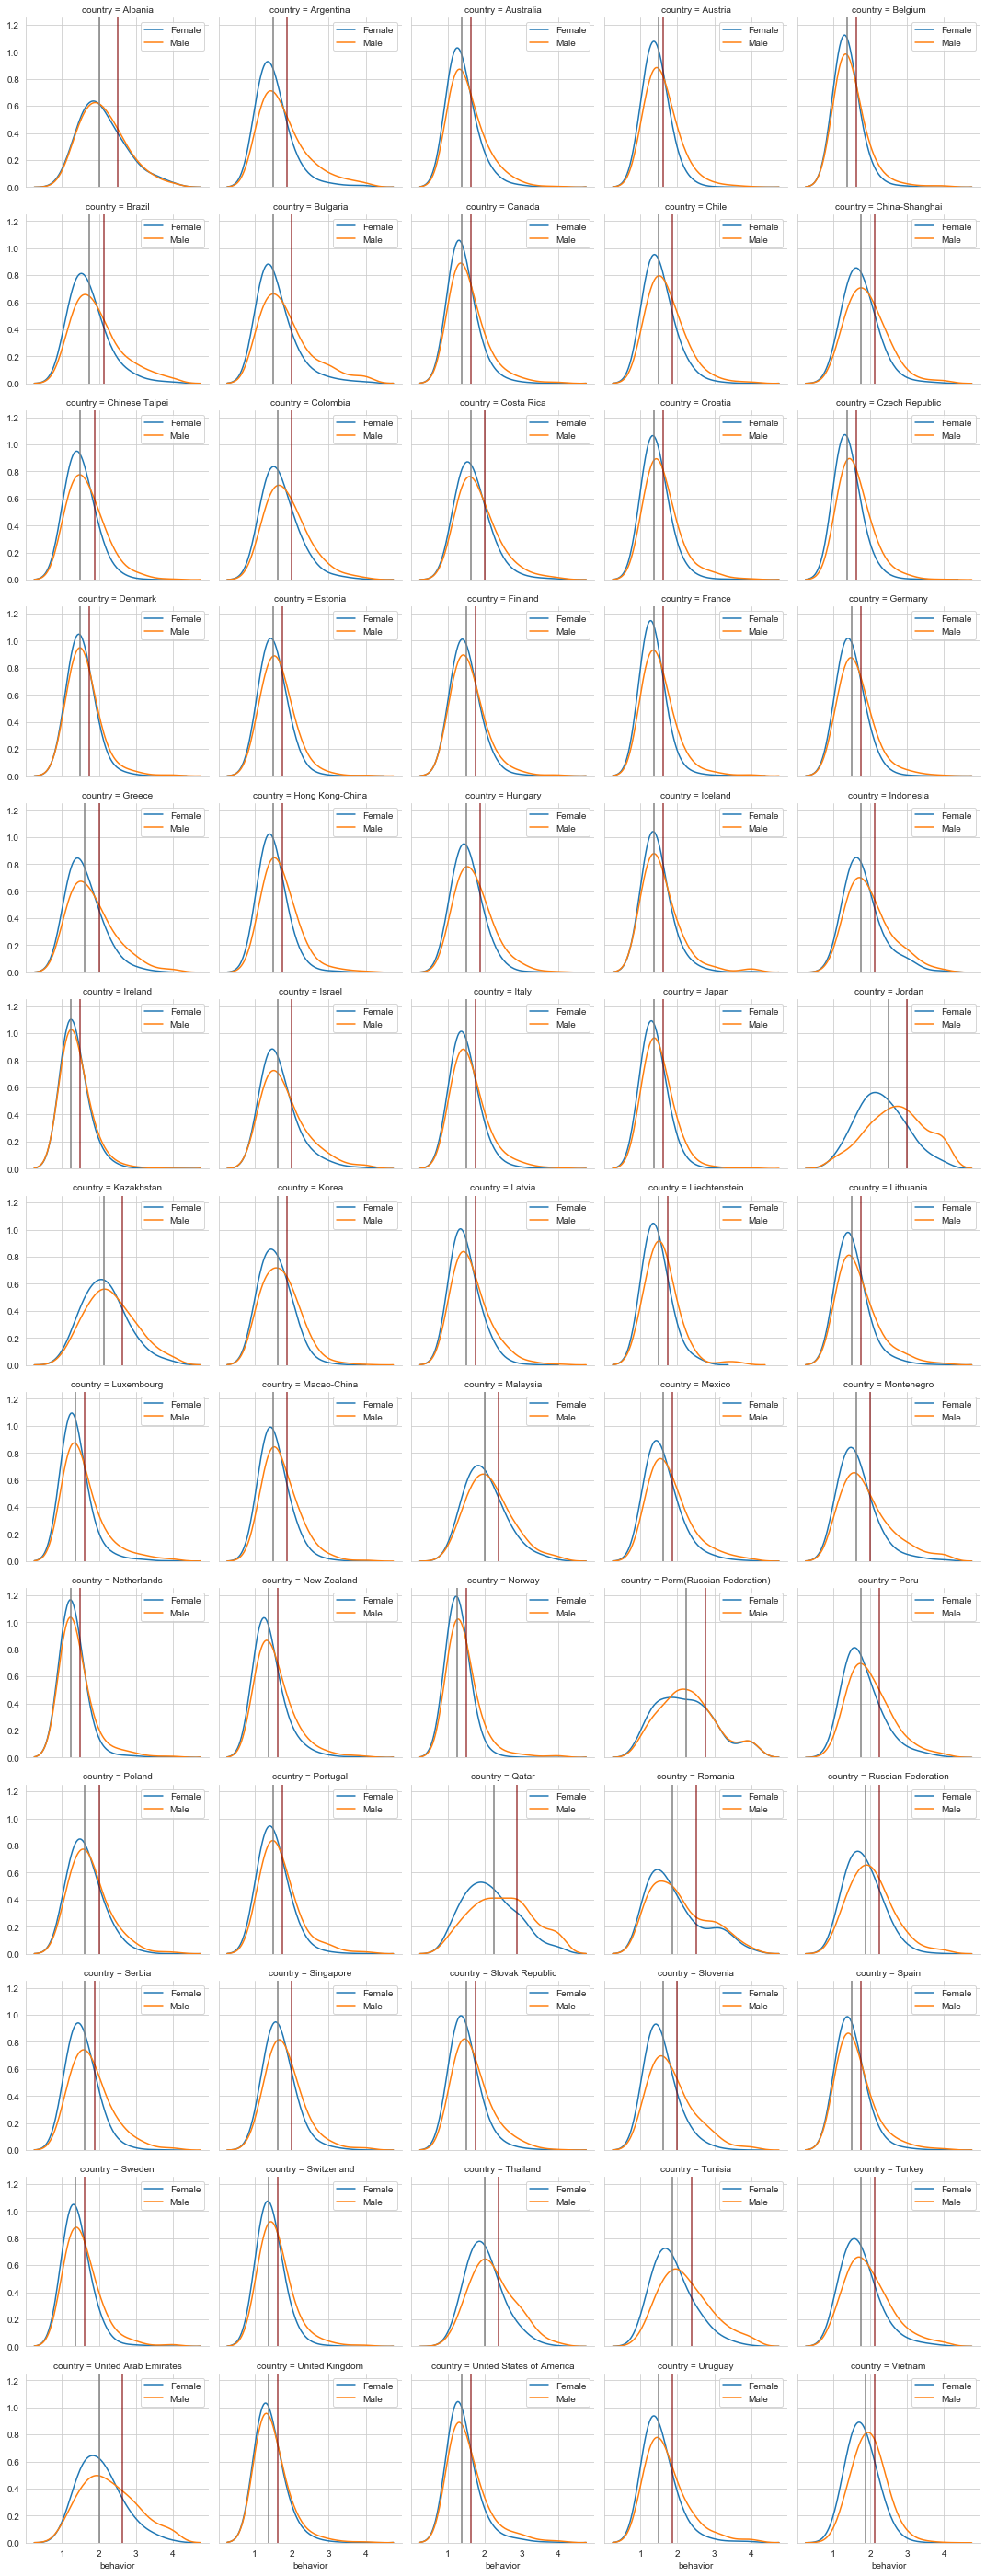

In [136]:
g = sb.FacetGrid(data = df, col = 'country', hue = 'gender', col_wrap = 5)
g.map(sb.kdeplot, 'behavior', bw = 1/4)

for ax, c in zip(g.axes.flat, country):
    ax.axvline(x = df.query('country==@c').behavior.quantile(.5), color = 'grey')
    ax.axvline(x = df.query('country==@c').behavior.quantile(.75), color = 'maroon', alpha = .75)
    ax.legend();

***Under behavior, females seem to have a higher score than male.***

### *Self Score By Gender By Country*

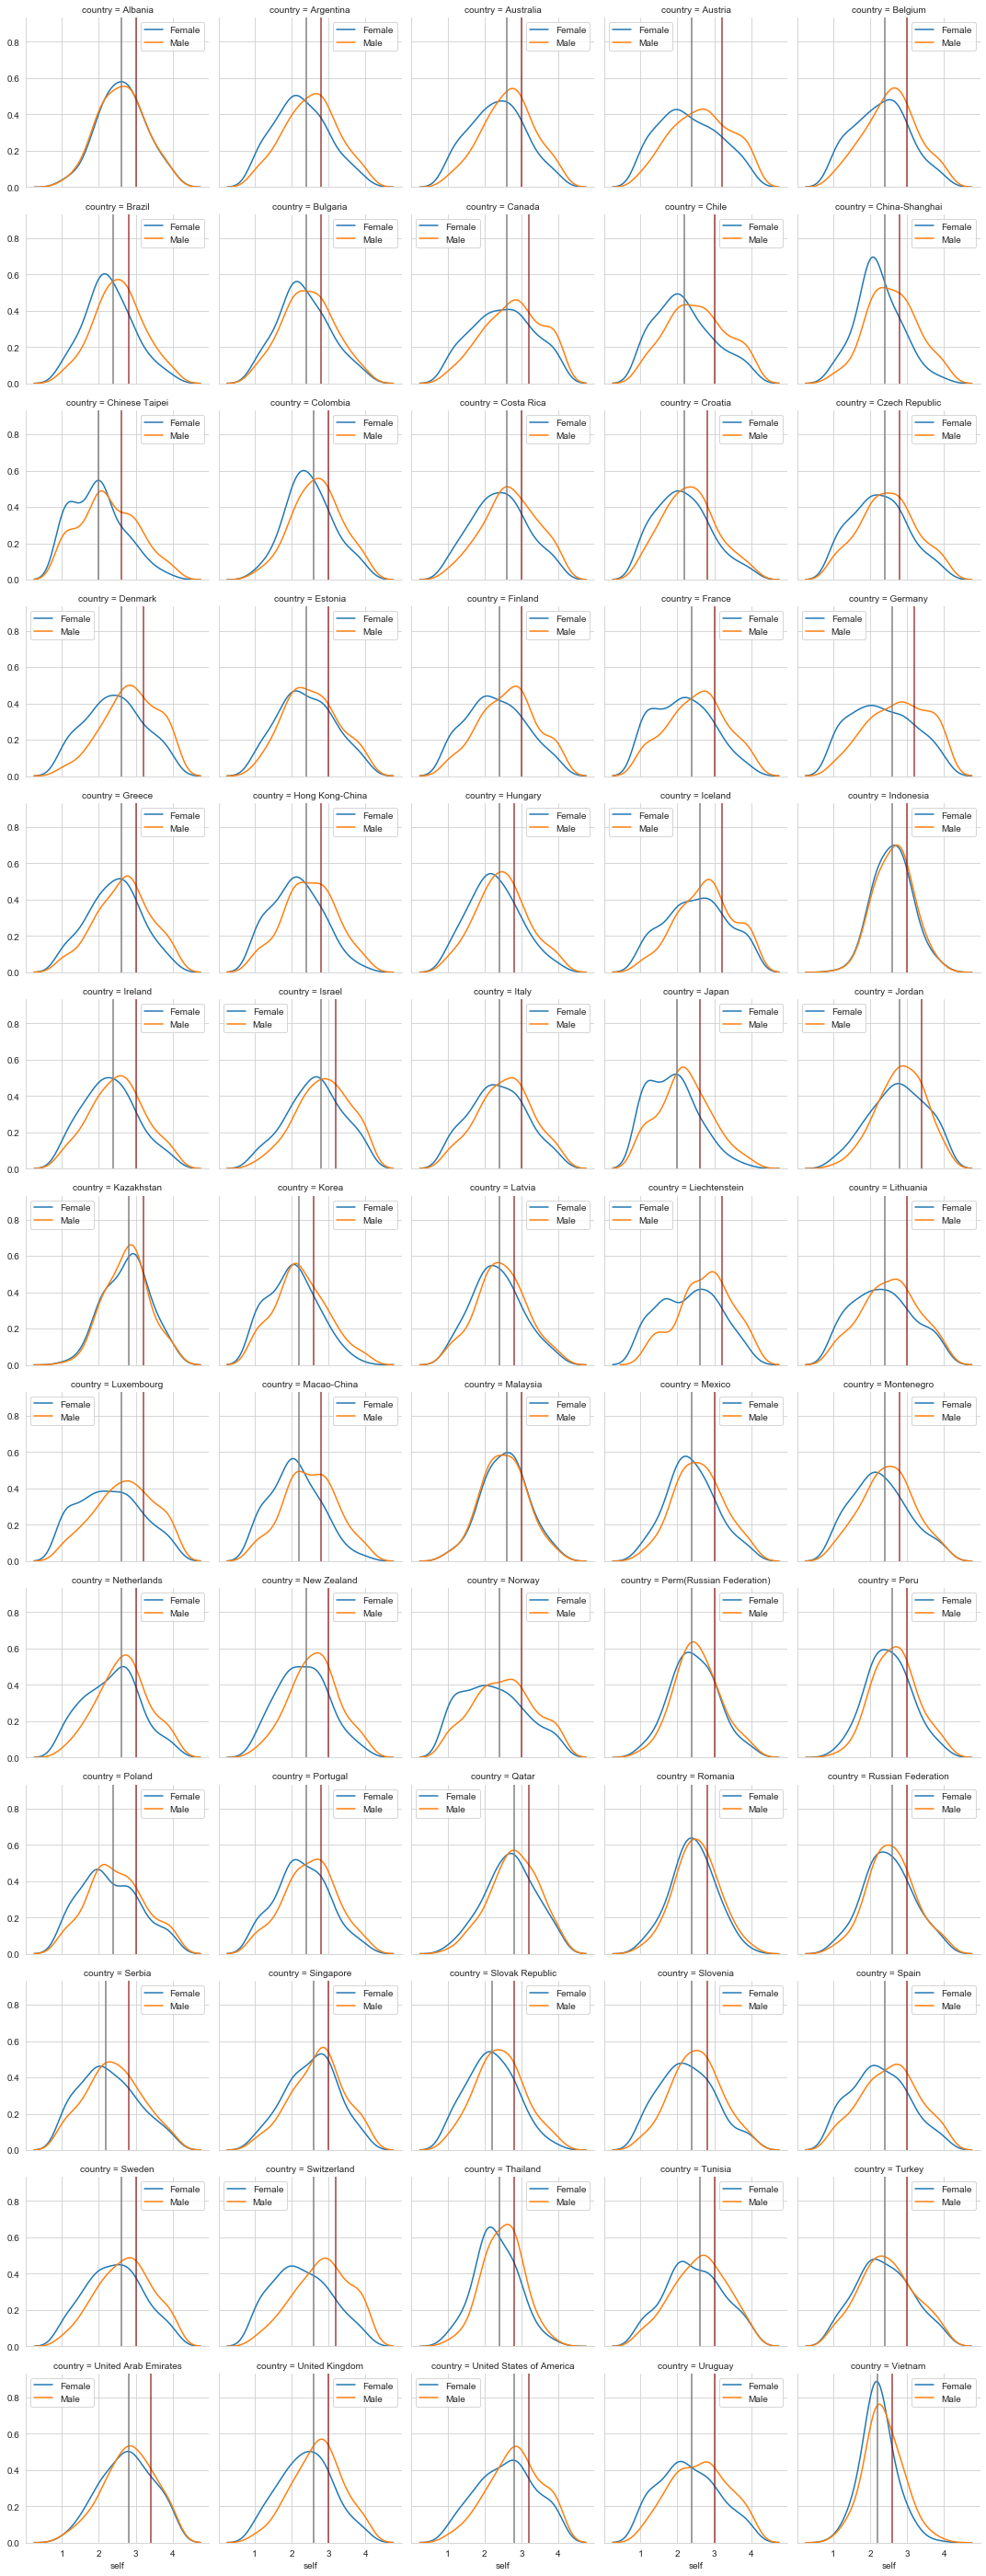

In [137]:
g = sb.FacetGrid(data = df, col = 'country', hue = 'gender', col_wrap = 5)
g.map(sb.kdeplot, 'self', bw = 1/4)

for ax, c in zip(g.axes.flat, country):
    ax.axvline(x = df.query('country==@c').self.quantile(.5), color = 'grey')
    ax.axvline(x = df.query('country==@c').self.quantile(.75), color = 'maroon', alpha = .75)
    ax.legend();

### *Parent Score By Gender By Country*

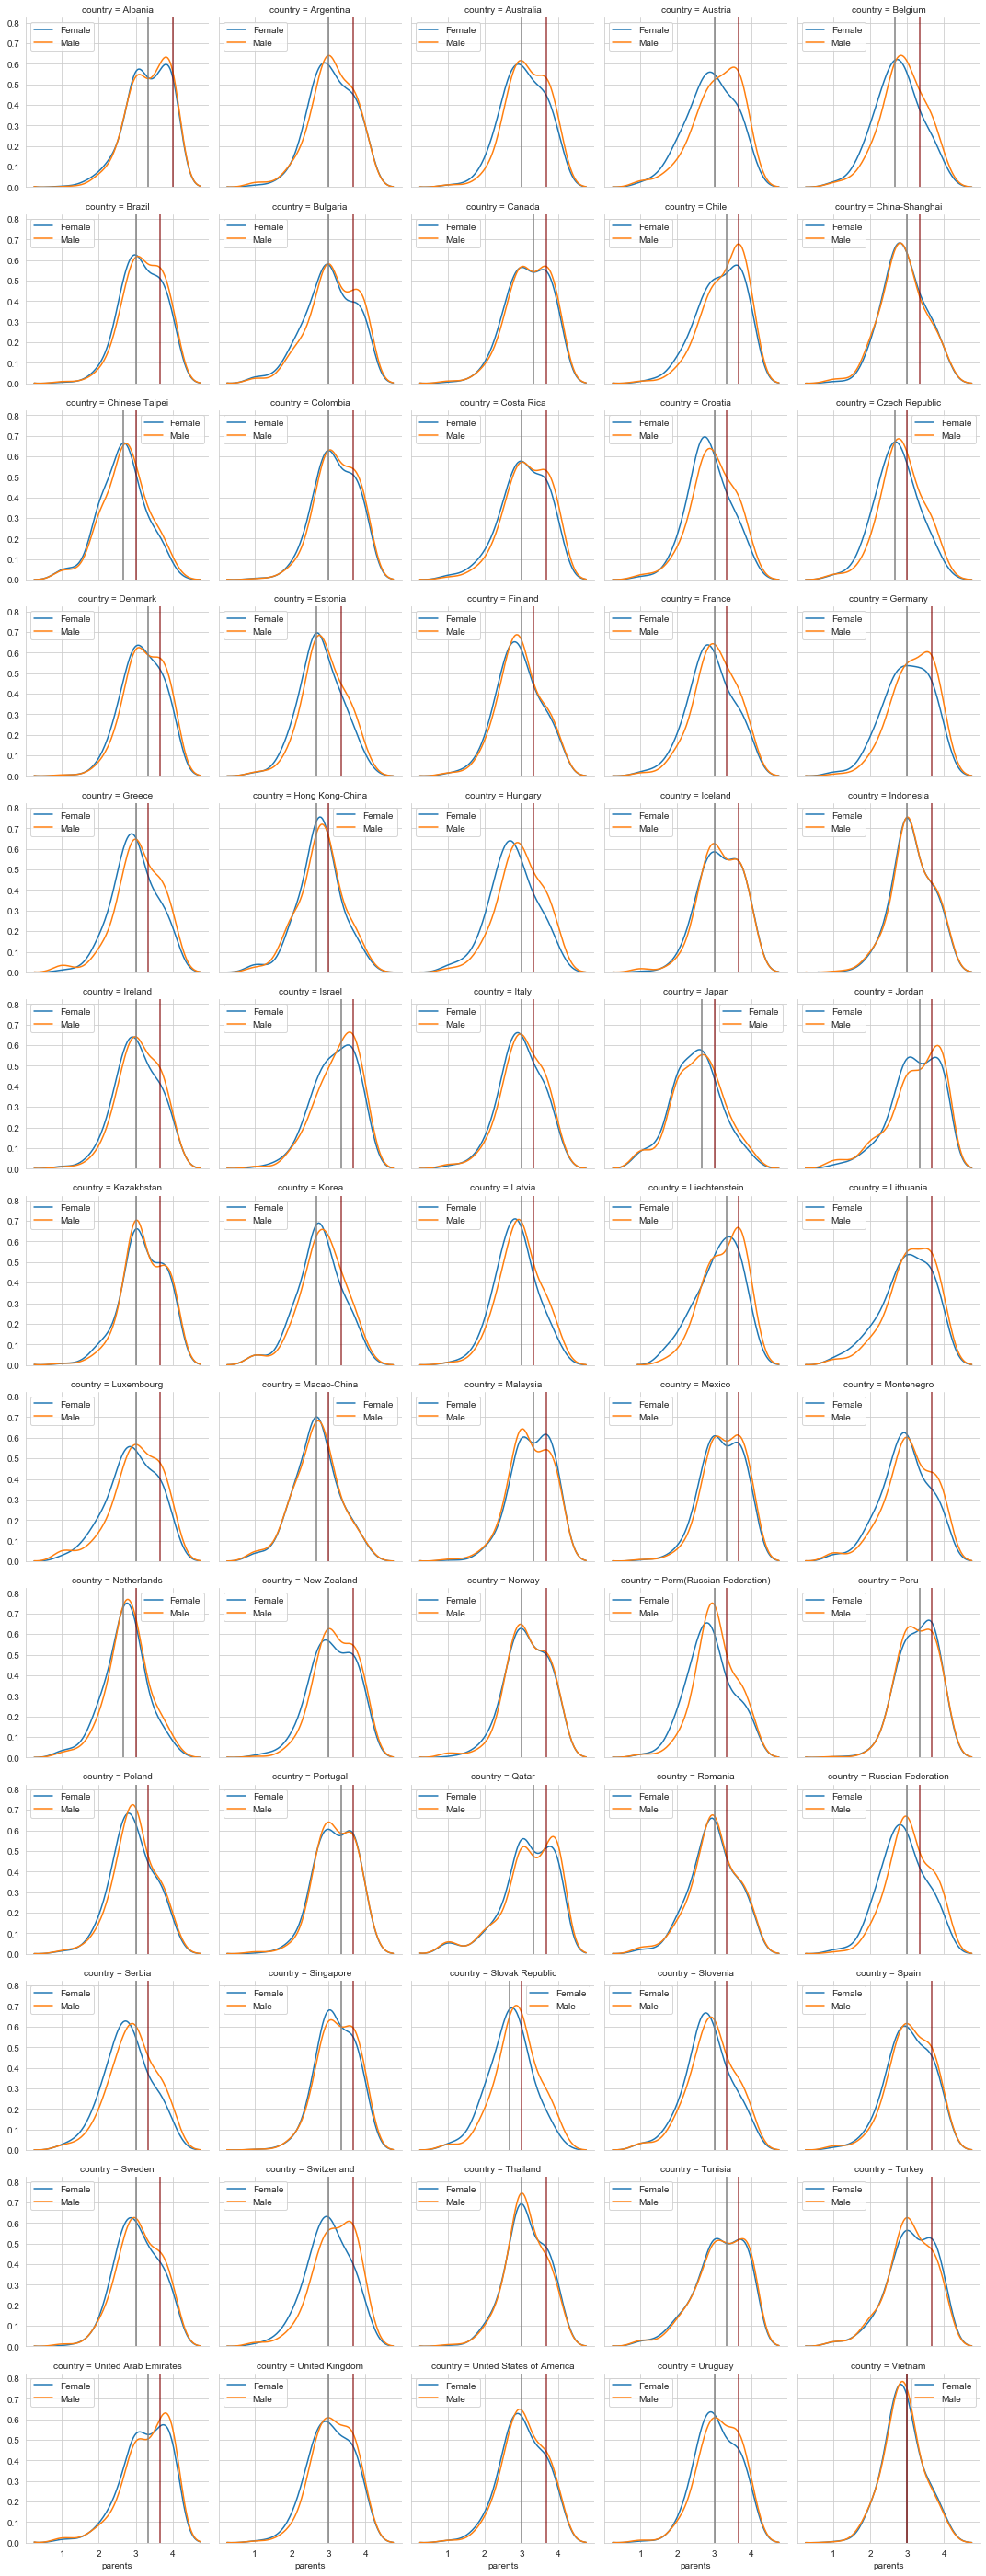

In [138]:
g = sb.FacetGrid(data = df, col = 'country', hue = 'gender', col_wrap = 5)
g.map(sb.kdeplot, 'parents', bw = 1/4)

for ax, c in zip(g.axes.flat, country):
    ax.axvline(x = df.query('country==@c').parents.quantile(.5), color = 'grey')
    ax.axvline(x = df.query('country==@c').parents.quantile(.75), color = 'maroon', alpha = .75)
    ax.legend();

***Males have higher self scores than females.***

### *Changes in Data as The Top Percentile Scores Increases*

In [140]:
# Creating new dataframe
df_new = pd.DataFrame(columns=['nth_percentile', 'm_prop', 'f_prop',
                         'avg_motivation','avg_anxiety','avg_interest','avg_work_ethic','avg_parents','avg_behavior','avg_self',
                        'm_motivation','m_anxiety','m_interest','m_work_ethic','m_parents','m_behavior','m_self',
                        'f_motivation','f_anxiety','f_interest','f_work_ethic','f_parents','f_behavior','f_self'])

In [141]:
#Appending new data for accounting changes
for i in range(100):
    n = i * .01
    # Selecting data
    sm = df.avg_math_score.quantile(n)
    ss = df.avg_science_score.quantile(n)
    sr = df.avg_reading_score.quantile(n)
    df_top = df.query('avg_math_score>=@sm or avg_science_score>=@ss or avg_reading_score>=@sr')
    
    # Finding proportion of male and female
    m_prop = df_top.gender.value_counts()['Male'] / df_top.gender.value_counts().sum()
    f_prop = df_top.gender.value_counts()['Female'] / df_top.gender.value_counts().sum()    
    
    # Getting mean of the scores
    motivation = df_top.motivation.mean()
    anxiety = df_top.anxiety.mean()
    interest = df_top.interest.mean()
    work_ethic = df_top.work_ethic.mean()
    parents = df_top.parents.mean()
    behavior = df_top.behavior.mean()
    self = df_top.self.mean()
    
    # Getting mean of the scores with females
    df_f = df_top.query('gender == "Female"')
    f_motivation = df_f.motivation.mean()
    f_anxiety = df_f.anxiety.mean()
    f_interest = df_f.interest.mean()
    f_work_ethic = df_f.work_ethic.mean()
    f_parents = df_f.parents.mean()
    f_behavior = df_f.behavior.mean()
    f_self = df_f.self.mean()
    
    # Getting mean of the scores with males
    df_m = df_top.query('gender == "Male"')
    m_motivation = df_m.motivation.mean()
    m_anxiety = df_m.anxiety.mean()
    m_interest = df_m.interest.mean()
    m_work_ethic = df_m.work_ethic.mean()
    m_parents = df_m.parents.mean()
    m_behavior = df_m.behavior.mean()
    m_self = df_m.self.mean()
    
    # Appending to data frame
    df_new = df_new.append({'nth_percentile':n,'m_prop':m_prop,'f_prop':f_prop,
                  'avg_motivation':motivation,'avg_anxiety':anxiety,'avg_interest':interest,
                  'avg_work_ethic':work_ethic,'avg_parents':parents,'avg_behavior':behavior,'avg_self':self,
                  'm_motivation':m_motivation,'m_anxiety':m_anxiety,'m_interest':m_interest,
                  'm_work_ethic':m_work_ethic,'m_parents': m_parents,'m_behavior':m_behavior,'m_self':m_self,
                  'f_motivation':f_motivation,'f_anxiety':f_anxiety,'f_interest':f_interest,
                  'f_work_ethic':f_work_ethic,'f_parents':f_parents,'f_behavior':f_behavior,'f_self':f_behavior},
                 ignore_index = True)

In [142]:
# top few rows
df_new.head()

nth_percentile    m_prop    f_prop  avg_motivation  avg_anxiety  \
0            0.00  0.495223  0.504777        2.988886     2.495314   
1            0.01  0.494440  0.505560        2.988823     2.494583   
2            0.02  0.493764  0.506236        2.988566     2.493558   
3            0.03  0.493075  0.506925        2.988307     2.492352   
4            0.04  0.492316  0.507684        2.987898     2.491152   

   avg_interest  avg_work_ethic  avg_parents  avg_behavior  avg_self  ...  \
0      2.445061        2.866265     3.066485      1.677428  2.482890  ...   
1      2.444261        2.866057     3.066432      1.676110  2.482722  ...   
2      2.443189        2.865825     3.066236      1.674186  2.482526  ...   
3      2.442070        2.865648     3.066016      1.672094  2.482370  ...   
4      2.440594        2.865395     3.065663      1.669821  2.482368  ...   

   m_parents  m_behavior    m_self  f_motivation  f_anxiety  f_interest  \
0   3.097665    1.758956  2.598975      2.940772   2.577510    2.380483   
1   3.097787    1.757043  2.598946      2.940509   2.577171    2.379923   
2   3.097652    1.754249  2.598852      2.940214   2.576626    2.379193   
3   3.097732    1.751551  2.598995      2.939675   2.575804    2.378182   
4   3.097457    1.748484  2.599204      2.939130   2.574968    2.377027   

   f_work_ethic  f_parents  f_behavior    f_self  
0      2.900185   3.036302    1.599006  1.599006  
1      2.900024   3.036138    1.598381  1.598381  
2      2.899907   3.035950    1.597451  1.597451  
3      2.899708   3.035508    1.596102  1.596102  
4      2.899654   3.035162    1.594777  1.594777  

[5 rows x 24 columns]

### *Gender Proportion*

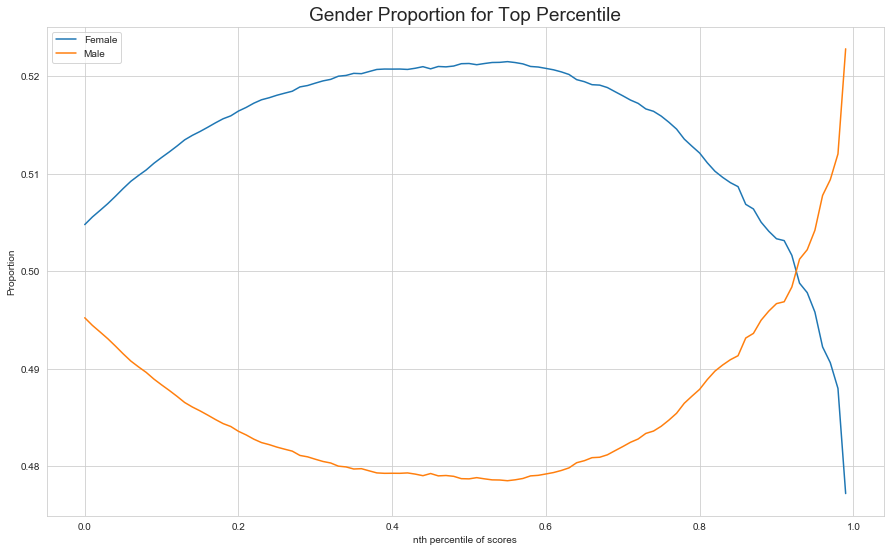

In [175]:
# Gender proportion for top percentile students.
plt.figure(figsize=(15, 9))
sb.lineplot(data = df_new,x = 'nth_percentile', y = 'f_prop', label = 'Female')
sb.lineplot(data = df_new,x = 'nth_percentile',y = 'm_prop', label = 'Male')
plt.legend()
plt.title('Gender Proportion for Top Percentile', fontsize = 19)
plt.ylabel('Proportion', fontsize = 10)
plt.xlabel('nth percentile of scores', fontsize = 10);

***We can see clearly here that as the top percentile increases, so does the gender gap. Initially, the female proportion was higher (due to the fact that there was a slightly more female students taking the survey as compared to the male students). But by the time we arrived to the top (approximately) 20th percentile, the amount of female students was equal to the amount of male students. All throughout the increase of top percentiles, we see that the proportion of male students strictly increases as well. Notice that the further we get along the top percentile of students, the gender gap's increase accelerates.***

### *Motivation Score*

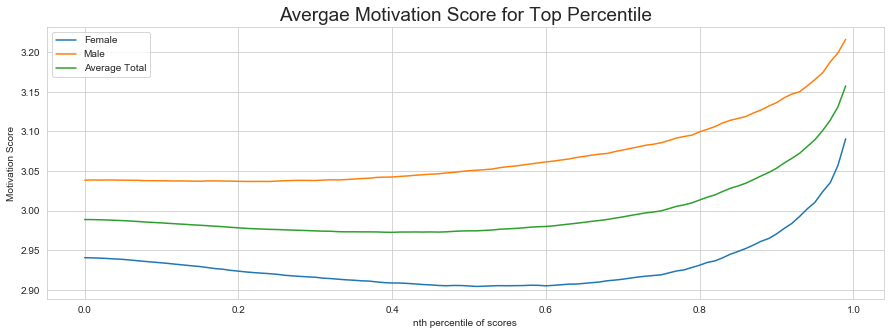

In [176]:
# Plotting the motivation score
plt.figure(figsize = (15, 5))
sb.lineplot(data = df_new, x = 'nth_percentile',y = 'f_motivation', label = 'Female')
sb.lineplot(data = df_new, x = 'nth_percentile',y = 'm_motivation', label = 'Male')
sb.lineplot(data = df_new, x = 'nth_percentile',y = 'avg_motivation', label = 'Average Total')

plt.legend()

plt.title('Avergae Motivation Score for Top Percentile', fontsize = 19)
plt.ylabel('Motivation Score', fontsize = 10)
plt.xlabel('nth percentile of scores', fontsize = 10);

***The average motivation score for males is consistently higher that the average motivation score for females.***

### *Anxiety Score*

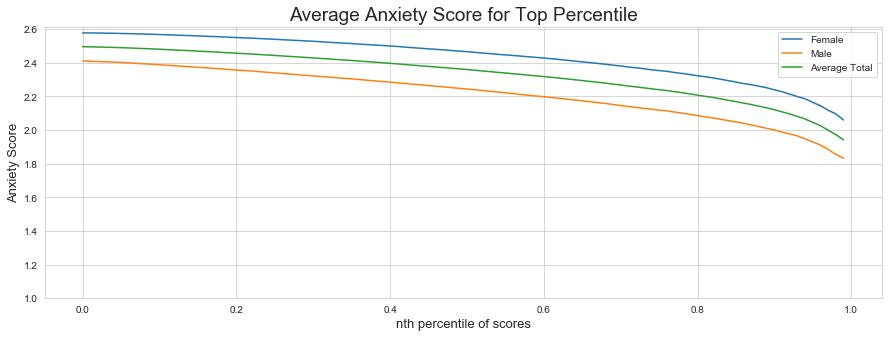

In [177]:
plt.figure(figsize = (15, 5))

sb.lineplot(data = df_new, x = 'nth_percentile', y = 'f_anxiety', label = 'Female')
sb.lineplot(data = df_new, x = 'nth_percentile', y = 'm_anxiety', label = 'Male')
sb.lineplot(data = df_new, x = 'nth_percentile', y = 'avg_anxiety', label = 'Average Total')

plt.legend();

plt.title('Average Anxiety Score for Top Percentile', fontsize = 19)
plt.ylim(bottom = 1)
plt.ylabel('Anxiety Score', fontsize = 13)
plt.xlabel('nth percentile of scores', fontsize = 13);


***The average anxiety score for females is consistently higher than the average anxiety score for males. As the top percentile increases, the anxiety scores for both gender decreases.***

### *Interest Score*

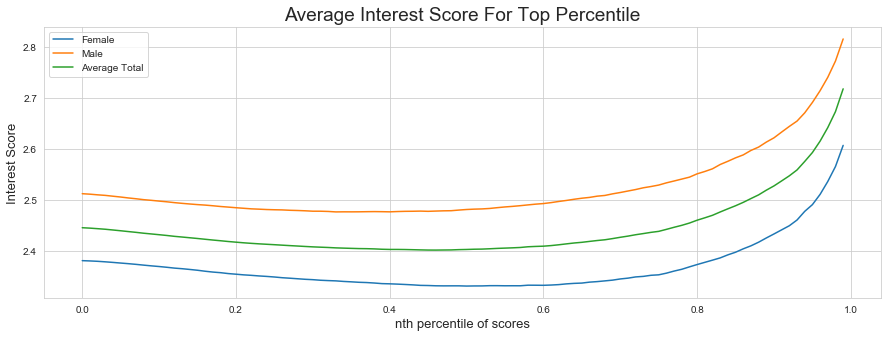

In [178]:
plt.figure(figsize = (15, 5))

sb.lineplot(data = df_new, x = 'nth_percentile', y = 'f_interest', label = 'Female')
sb.lineplot(data = df_new, x = 'nth_percentile', y = 'm_interest', label = 'Male')
sb.lineplot(data = df_new, x = 'nth_percentile', y = 'avg_interest', label = 'Average Total')

plt.legend();

plt.title('Average Interest Score For Top Percentile', fontsize = 19)
plt.ylabel('Interest Score', fontsize = 13)
plt.xlabel('nth percentile of scores', fontsize = 13);

***The average interest score for males is consistently higher that the average interest score for females.***

### *Ethic Score*

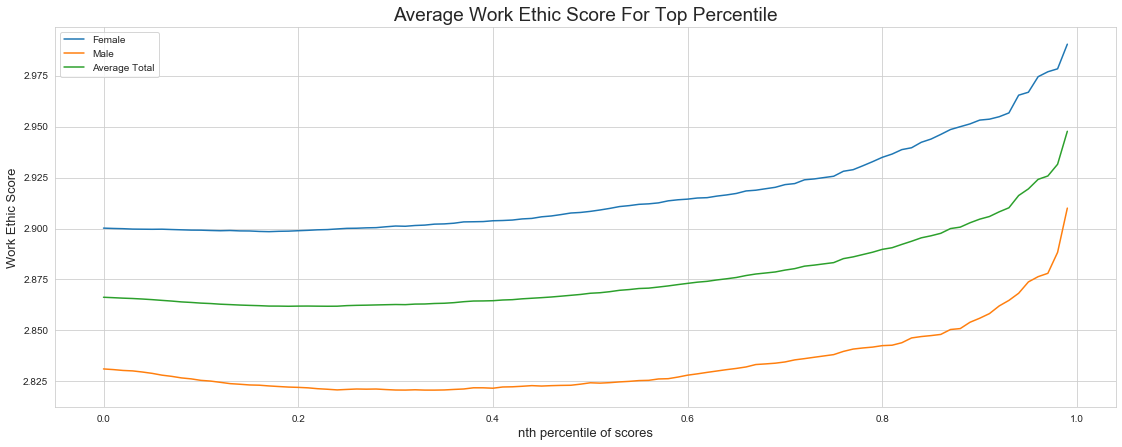

In [179]:
plt.figure(figsize = (19, 7))

sb.lineplot(data = df_new, x = 'nth_percentile', y = 'f_work_ethic', label = 'Female')
sb.lineplot(data = df_new, x = 'nth_percentile', y = 'm_work_ethic', label = 'Male')
sb.lineplot(data = df_new, x = 'nth_percentile', y = 'avg_work_ethic', label = 'Average Total')
plt.legend()
plt.title('Average Work Ethic Score For Top Percentile', fontsize = 19)
plt.ylabel('Work Ethic Score', fontsize = 13)
plt.xlabel('nth percentile of scores', fontsize = 13);


***The average work ethic score for females is consistently higher that the average work score for males.***

### *Parent Score*

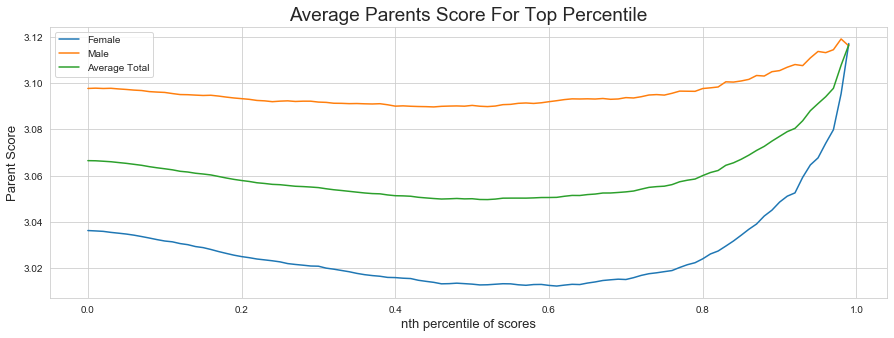

In [180]:
plt.figure(figsize = (15, 5))

sb.lineplot(data = df_new, x = 'nth_percentile', y = 'f_parents', label = 'Female')
sb.lineplot(data = df_new, x = 'nth_percentile', y = 'm_parents', label = 'Male')
sb.lineplot(data = df_new, x = 'nth_percentile', y = 'avg_parents', label = 'Average Total')
plt.legend();
plt.title('Average Parents Score For Top Percentile', fontsize = 19)
plt.ylabel('Parent Score', fontsize = 13)
plt.xlabel('nth percentile of scores', fontsize = 13);


***The average parent score for males is consistently higher that the average motivation score for females. Notice how there is a sharp dip in parent score for males students at around the 85th percentile.***

### *Behaviour Score*

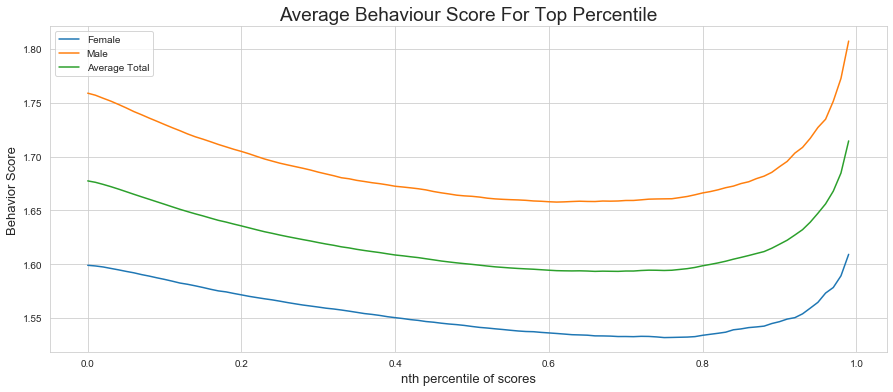

In [181]:
plt.figure(figsize = (15, 6))

sb.lineplot(data = df_new, x = 'nth_percentile', y = 'f_behavior', label = 'Female')
sb.lineplot(data = df_new, x = 'nth_percentile', y = 'm_behavior', label = 'Male')
sb.lineplot(data = df_new, x = 'nth_percentile', y = 'avg_behavior', label = 'Average Total')
plt.legend()
plt.title('Average Behaviour Score For Top Percentile', fontsize = 19)
plt.ylabel('Behavior Score', fontsize = 13)
plt.xlabel('nth percentile of scores', fontsize = 13);

***The average behavior score for males is consistently higher that the average behavior score for females.***

### *Self Score*

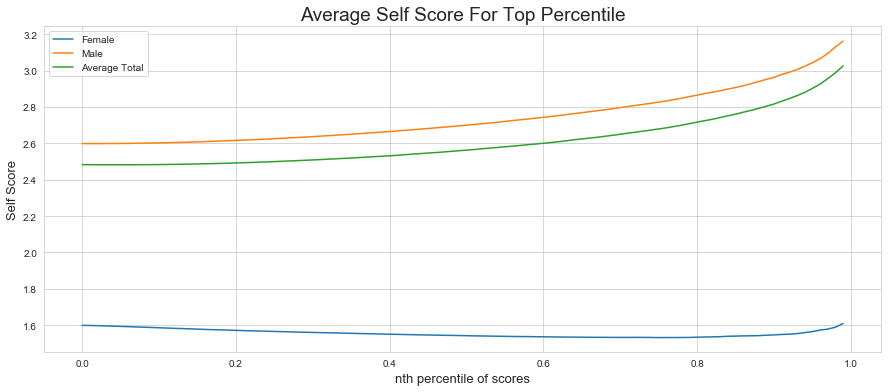

In [182]:
plt.figure(figsize = (15, 6))

sb.lineplot(data = df_new, x = 'nth_percentile', y = 'f_self', label = 'Female')
sb.lineplot(data = df_new, x = 'nth_percentile', y = 'm_self', label = 'Male')
sb.lineplot(data = df_new, x = 'nth_percentile', y = 'avg_self', label = 'Average Total')
plt.legend()
plt.title('Average Self Score For Top Percentile', fontsize = 19)
plt.ylabel('Self Score', fontsize = 13)
plt.xlabel('nth percentile of scores', fontsize = 13);

***The average self score for males is consistently higher and a lot higher than the average self score for females. Note how there is a large gap between how females feel about themselves regarding their math skills as compared to how males feel about themselves in their math skills.***

## Conclusion

**From above analysis,**

- **The average Score of Math is normally distributed with a peak at around 450.**
- **The average Score of Reading is normally distributed with a peak at around 500.**
- **The average Score of Science is normally distributed with a peak at around 500.**
- Most countries have between 5000 to 7000 students taking the survey. The boxplot also shows that there are a few outliers. For example, **Mexico and Italy have over 30,000 students and Liechtenstein has well below 1000 students.**
- *The graph is slightly skewed to the left showing that most students have a positive view of their parent's attitudes towards Mathematics.*
- **As the top nth percentile increases, the gender gap increases as well** i.e. Male is increasing as the percentile increases.
- **While most countries show an almost 50/50 split between gender, there are some countries like Mexico, Thailand and Israel that show an very uneven split.**
- *If we take a look at the top 10 countries with the most gender differences, 7 out of 10 countries are female dominated.*
- **The Female students has consistent high scores in all subjects(Maths, Science, Reading) than the Male students.**
- *It looks like the there is only a slight difference in male/female perception of their parent's towards mathematics. For both male and female, the 25%, 50%, and 75% are same.*
- **We see that only a slight amount of Male Students view their parent's having a higher perception of Mathematics.**
- *Males students have a high score under motivation, interest, and self. Female students seem to score higher under anxiety as well as work_ethic. There is only slight variation between scores of male and female.*
- **We can see that there is high correlation between scores of subjects and an significant correlation between attitudes.**
- *Almost all countries show the male students outweighing female students in motivation scores. This shows that male students are more motivated in some countries to their studies than females.
- Almost all of the countries show Males have a higher than average or similar axienty score compared to their females but in some countries females have more anxiety than male mainly in countries where most females are prevented from those.*
- *Females interest scores are higher in developed countries as compare to the countries where females still lack some major rights.*
- *Under Work Ethic, the females seem to score higher (or about the same) in proportion comparted to the males.*
- *Under behavior, females seem to have a higher score than male.*
- *Males have higher self scores than females.*
- **We can see clearly here that as the top percentile increases, so does the gender gap. Initially, the female proportion was higher (due to the fact that there was a slightly more female students taking the survey as compared to the male students). But by the time we arrived to the top (approximately) 20th percentile, the amount of female students was equal to the amount of male students. All throughout the increase of top percentiles, we see that the proportion of male students strictly increases as well. Notice that the further we get along the top percentile of students, the gender gap's increase accelerates.**
- **The average motivation score for males is consistently higher that the average motivation score for females.**
- **The average anxiety score for females is consistently higher than the average anxiety score for males. As the top percentile increases, - the anxiety scores for both gender decreases.**
- **The average interest score for males is consistently higher that the average interest score for females.**
- **The average work ethic score for females is consistently higher that the average work score for males.**
- **The average parent score for males is consistently higher that the average motivation score for females. Notice how there is a sharp dip in parent score for males students at around the 85th percentile.**
- **The average behavior score for males is consistently higher that the average behavior score for females.**
- **The average self score for males is consistently higher and a lot higher than the average self score for females. Note how there is a large gap between how females feel about themselves regarding their math skills as compared to how males feel about themselves in their math skills.**